# **Банки — Анализ оттока клиентов**
_____
Изучение поведения клиентов банка «Метанпром».

*В банке «Метанпром» усилился отток клиентов, а привлекать новых дороже, чем удерживать имеющихся — необходимо понять, какие клиенты склонны уходить и выработать рекомендации для отдела маркетинга.*
    
*Банк «Метанпром» расположен в Ярославле, Ростове Великом и Рыбинске. Датасет с данными о клиентах содержит информацию: идентификатор пользователя, баллы кредитного скоринга, город, пол, возраст, количество объектов в собственности / количество баллов собственности, баланс на счёте, количество продуктов, есть ли кредитная карта, активный клиент, заработная плата клиента, ушёл или нет.*


_____
**Цель исследования:**
Помочь менеджменту банка снизить отток клиентов.

**Задачи исследования:**
* Проанализировать данные о клиентах банка.
* Сформировать портрет клиента, склонного уходить из банка.
* Сформулировать и проверить статистические гипотезы о:
 - Различии дохода между теми клиентами, которые ушли и теми, которые остались,
 - Различии числа используемых продуктов между теми клиентами, которые ушли и теми, которые остались.
* Сформулировать выводы и рекомендации.


**Содержание исследования**

***Часть 1. Импорт данных:***
* [1. Импорт библиотек и загрузка данных](#1-bullet)
* [2. Изучение данных](#2-bullet)

***Часть 2. Предобработка данных:***
* [1. Замена названий столбцов](#3-bullet)
* [2. Проверка типов данных и наличия пропусков, дубликатов, выбросов и устранение выявленных проблем](#4-bullet)
* [3. Кодирование данных](#5-bullet)

***Часть 3. Исследовательский анализ данных:***
* [1. География клиентов](#6-bullet)
* [2. Пол и возраст клиентов](#7-bullet)
* [3. Собстенность клиентов](#8-bullet)
* [4. Распределение балансов клиентов](#9-bullet)
* [5. Распределение числа продуктов у клиентов](#10-bullet)
* [6. Анализ наличия кредитных карт](#11-bullet)
* [7. Анализ уровня заработной платы клиентов](#12-bullet)
* [8. Анализ баллов скоринга](#13-bullet)
* [9. Анализ активности клиентов](#14-bullet)

***Часть 4. Сравнение клиентов склонных и несклонных уходить***
* [1. Георгафия клиентов](#15-bullet)
* [2. Пол и возраст клинетов](#16-bullet)
* [3. Собственность клиентов](#17-bullet)
* [4. Баланс клиентов](#18-bullet)
* [5. Число продуктов клиентов](#19-bullet)
* [6. Наличие кредитных карт](#20-bullet)
* [7. Анализ баллов скоринга](#21-bullet)
* [8. Анализ заработной платы](#22-bullet)
* [9. Анализ активности](#23-bullet)
* [10. Таблица сравнения ушедших и оставшихся](#24-bullet)
* [11. Анализ корреляции признаков](#25-bullet)

***Часть 5. Проверка гипотез:***
* [1. Различие уровня дохода между теми клиентами, которые ушли и теми, которые остались](#26-bullet)
* [2. Различие числа используемых продуктов между теми клиентами, которые ушли и теми, которые остались](#27-bullet)

***Часть 6. Формулирование предварительных выводов:***
* [1. Педварительные выводы](#28-bullet)
* [2. На основании выводов выбор признаков для сегментации](#29-bullet)

***Часть 7. Сегментация:***
* [1. Выделение категорий клиентов, в которых % оттока выше, чем в среднем среди всех клиентов](#30-bullet)

***Часть 8. Формутирование выводов и рекомендаций:***
* [1. Выводы и рекомендации](#31-bullet)
* [2. Приоритезация сегментов](#32-bullet)

***Часть 9. Подготовка презентации:***
* [1. Презентация](#33-bullet)

***Часть 10. Подготовка дашборда:***
* [1. Дашборд](#34-bullet)

## Импорт данных

<a id='1-bullet'></a>

### Импорт библиотек и загрузка данных

In [1]:
# Импортируем библиотеки, используемые в проекте.

import os
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats as st
import math as mth
import plotly.express as px
from plotly import graph_objects as go

# Установим размер графиков.
# Повысим качество отображения графиков.

%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (15,8) 

# Обеспечиваем вывод всех столбцов ивсего текста в них.

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

In [2]:
# Сохраним данные в переменную.
pth1 = '/datasets/bank_dataset.csv'

if os.path.exists(pth1):
    final_ab_events = pd.read_csv(pth1)
else:
    print('Something is wrong')

<a id='2-bullet'></a>

### Изучение данных

In [3]:
# Посмотрим корректность отображения данных.

data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Датасет отображается корректно.

## Предобработка данных

<a id='3-bullet'></a>

### Замена названий столбцов

In [4]:
# Зададим функцию для приведения названий столбцов к стандартному виду и первичного анализа данных.

def analysis(data):
    print(data.head())
    print('*'*50)
    data.columns = data.columns.str.lower()
    data.columns = data.columns.str.replace(' ', '_')
    print(data.head())
    print('*'*50)
    print(data.info())
    print('*'*50)
    print('Пропусков:', data.isna().sum())
    print('*'*50)
    print('Дубликатов:',data.duplicated().sum())
    print('*'*50)
    print(data.describe())
    print('*'*50)
    print(data.value_counts())

<a id='4-bullet'></a>

### Проверка типов данных и наличия пропусков, дубликатов, выбросов и устранение выявленных проблем

In [5]:
# Предварительно обработаем и изучим двнные с помощью функции.

analysis(data)

   USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1  
**************************************************
   userid  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5  

В датасете 10 000 строк и 12 колонок. Полных дубликатов нет, есть пропуски в данных о возрасте (всего 26) и в данных о балансе (2 295).
Отрицательного возраста, баланса, зарплаты и баллов нет. Возраст от 18 до 86 выглядит корректным.

In [6]:
# Проверим число строк со значением 0 в столбце 'products'.

data.loc[data['products'] == 0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Всего одна строка — удалим ее.

In [7]:
# Фиксируем число данных до удаления.

data.count()

userid           10000
score            10000
city             10000
gender           10000
age               9974
equity           10000
balance           7705
products         10000
credit_card      10000
last_activity    10000
est_salary       10000
churn            10000
dtype: int64

In [8]:
# Удаляем строку с 0 продуктов.

data = data.loc[data['products'] != 0]

In [9]:
# Проверим число данных после удаления.

data.count()

userid           9999
score            9999
city             9999
gender           9999
age              9973
equity           9999
balance          7705
products         9999
credit_card      9999
last_activity    9999
est_salary       9999
churn            9999
dtype: int64

In [10]:
# Посмотрим пропуски в данных о возрасте.

data[data['age'].isna()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


Явной логики в пропусказ не видно: клиенты разного пола, из разных филиалов, с разным доходом, в большей степени активные и с кредитой картой (что отдельно странно: все-таки для одобрения кредитного продукта возраст — важный критерий), большинство "клиентов без возраста" не ушедшие, при этом у многих пропущены и данные о балансе, а всего таких строк менее полупроцента от общего числа — думаю, можно их удалить.

In [11]:
# Фиксируем число данных до удаления.

data.count()

userid           9999
score            9999
city             9999
gender           9999
age              9973
equity           9999
balance          7705
products         9999
credit_card      9999
last_activity    9999
est_salary       9999
churn            9999
dtype: int64

In [12]:
# Удаляем строки с пропусками в столбце возраста.

data.dropna(subset=['age'], inplace=True)

In [13]:
# Проверим число данных после удаления.

data.count()

userid           9973
score            9973
city             9973
gender           9973
age              9973
equity           9973
balance          7695
products         9973
credit_card      9973
last_activity    9973
est_salary       9973
churn            9973
dtype: int64

Пропусков в столбце баланса занчительно больше — просто удалить их нельзя, а визуально просмотреть невозможно. Попрбуем поискать закономерность: сравним данные с пропусками по разным столбцам.

In [14]:
# Посмотрим по филиалам.

print(data.groupby('city')['userid'].count())
print('-----')
data[data['balance'].isna()].groupby('city')['userid'].count()

city
Ростов       1416
Рыбинск      2682
Ярославль    5875
Name: userid, dtype: int64
-----


city
Ростов        235
Рыбинск       585
Ярославль    1458
Name: userid, dtype: int64

Заметного отличия нет.

In [15]:
# Посмотрим по полу.

print(data.groupby('gender')['userid'].count())
print('-----')
data[data['balance'].isna()].groupby('gender')['userid'].count()

gender
Ж    4982
М    4991
Name: userid, dtype: int64
-----


gender
Ж    1006
М    1272
Name: userid, dtype: int64

В данных практически равное число мужчин и женщин, а пропуски в информации о балансе у мужчин встречаются на 20 % чаще, но сделать из этого какой-то вывод не представляется возможным.

In [16]:
# Посмотрим по баллам скоринга.

print(data['score'].mean())
print('-----')
data.loc[data['balance'].isna(), 'score'].mean()

848.6712122731375
-----


865.3147497805093

Балл у клиентов с пропуском в балансе выше, но это опять-таки не демонстриует какую-то логику.

In [17]:
# Посмотрим по баллам имущества.

print(data['equity'].mean())
print('-----')
data.loc[data['balance'].isna(), 'equity'].mean()

2.6308031685550985
-----


0.05004389815627744

Балл имущества у клиентов с пропусками в балансе значительно ниже и близок к нулю.

In [19]:
# Посмотрим число клиентов с нулевым баллом имущества.

data.loc[data['equity'] == 0, 'userid'].count()

2576

In [20]:
# Посмотрим число клиентов с нулевым баллом имущества и заполненным балансом.

data.loc[(data['equity'] == 0) & (~data['balance'].isna()), 'userid'].count()

412

In [21]:
# Посмотрим строк с пропуском в балансе и 0 баллов собственности от всех строк с пропусками.

round(data.loc[(data['equity'] == 0) & (data['balance'].isna()), 'userid'].count() / 
data.loc[data['balance'].isna(), 'userid'].count() * 100)

95

Получается, у всех клиентов с пропусков в данных о балансе околонулевой балл имущества. Клиентов с нулевым баллом имущества и заполненным балансом всего чуть больше четырехсот. При этом строк, в которых и пропущен баланс, и балл собственности равен 0 больше двух тысяч, это 95 % всех строк с пропусками в балансе. Данный факт скорее вызывает вопрос о корректности бала по имуществу, чем объясняет отсутсвие данных о балансе, но без уточнения у инженеров, осуществлявших выгрузку, врядли возможно что-то сказать.

In [22]:
# Автоматизируем провреку по остальным столбцам.

columns = ['products', 'credit_card', 'last_activity', 'est_salary', 'churn']

for c in columns:
    print(c)
    print(data[c].mean())
    print('-----')
    print(data.loc[data['balance'].isna(), c].mean())

products
1.8716534643537552
-----
1.1637401229148376
credit_card
0.6802366389250978
-----
0.8156277436347673
last_activity
0.5229118620274742
-----
0.5491659350307287
est_salary
147799.1152411511
-----
226433.77631255487
churn
0.18229218891005716
-----
0.0052677787532923615


У клиентов с пропусками в данных о балансе в среднем меньше число продуктов, чаще есть кредитная карта, выше зарплата (возможно, из-за выбросов) и они чаще среди ушедших из банка.

В целом какой-то явной связи, кроме как с баллами недвижимости, незаметно. Пропуски похожи на случайные. Их много — удалить мы их не можем, подобрать логику для заполнения не представляется возможным.

In [23]:
# Посмотрим, повторяются ли клиенты в датасете.

data[data.duplicated(['userid'], keep=False)].sort_values('userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
4216,226719,903.0,Рыбинск,Ж,63.0,0,NaN,1,1,0,138582.58,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1


Возможно, в двух филиалах разным клиентам давали одинаковые id, так как остальные данные отличаются. Скорее всего, такие данные, если их остаить, не вызовут искажений, но поскольку таких строк 100 — менее 1 %, их можно удалить, чтобы не возникло путаницы.

In [24]:
# Фиксируем число данных до удаления.

data.count()

userid           9973
score            9973
city             9973
gender           9973
age              9973
equity           9973
balance          7695
products         9973
credit_card      9973
last_activity    9973
est_salary       9973
churn            9973
dtype: int64

In [25]:
data = data.drop_duplicates(subset='userid', keep=False)

In [26]:
# Проверим число данных после удаления.

data.count()

userid           9873
score            9873
city             9873
gender           9873
age              9873
equity           9873
balance          7614
products         9873
credit_card      9873
last_activity    9873
est_salary       9873
churn            9873
dtype: int64

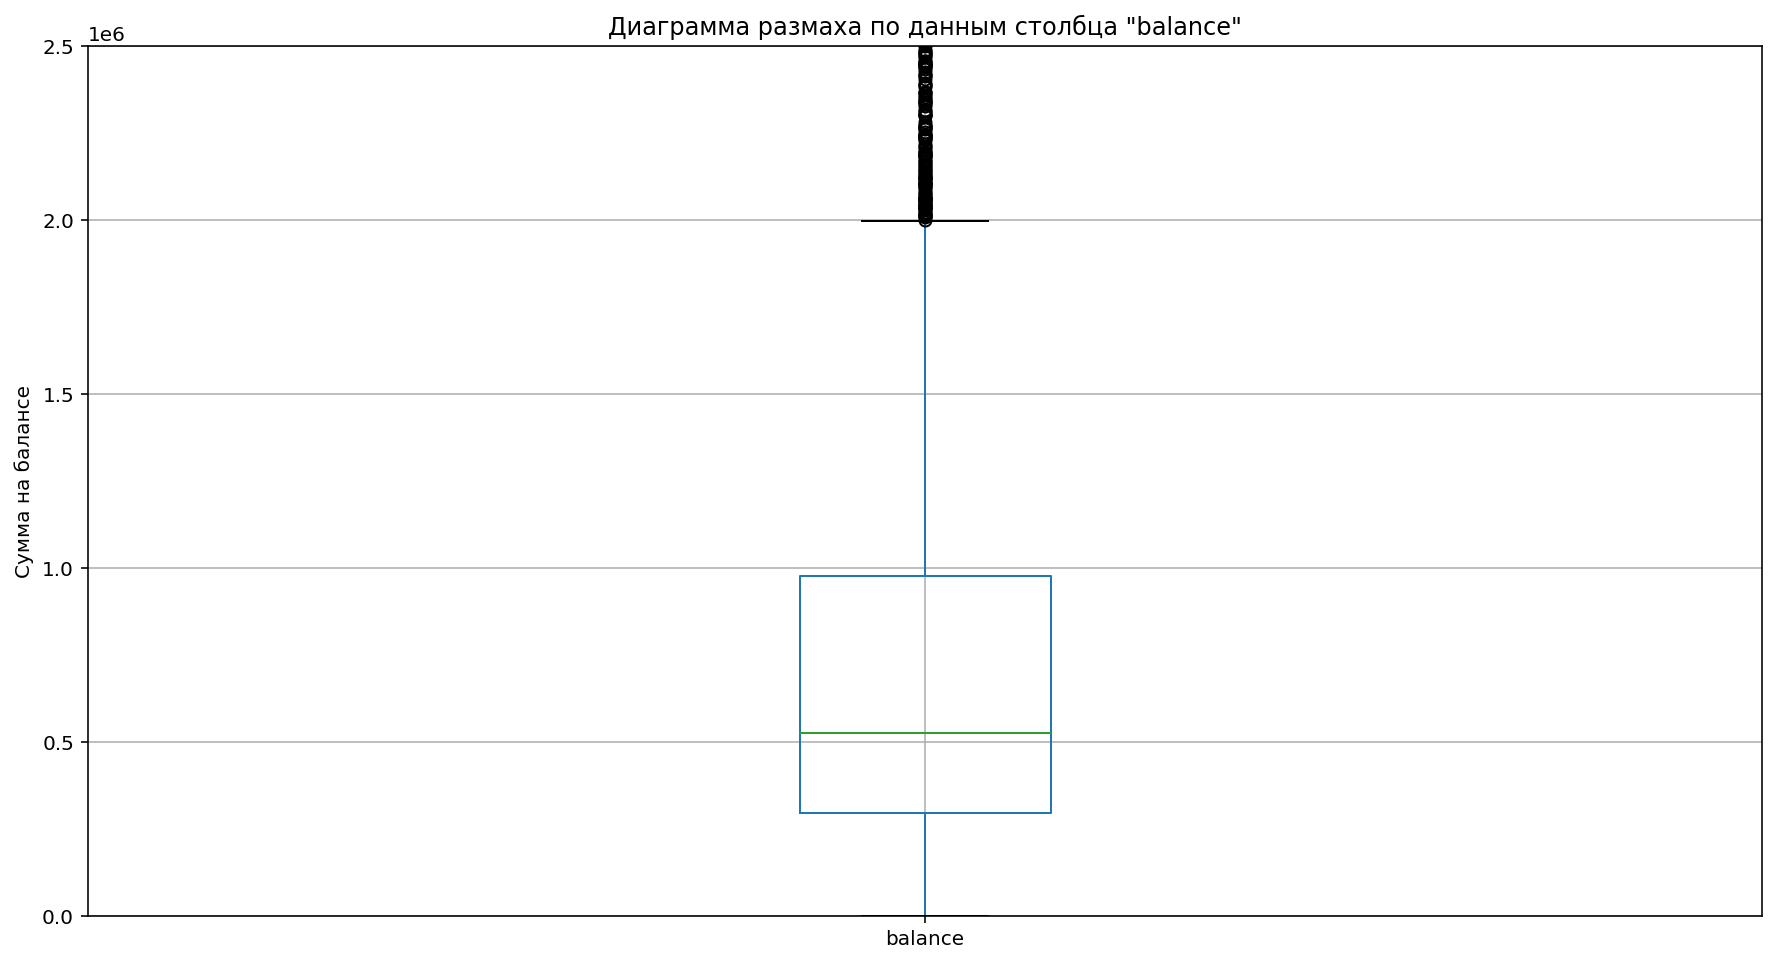

In [27]:
# Построим диаграмму размаха по столбцу 'balance'.

ax = data.boxplot('balance').set(title='Диаграмма размаха по данным столбца "balance"', 
                                ylabel='Сумма на балансе', ylim=(0, 2500000))
#ax.set_ylim(0, 2500000)
plt.show()

In [28]:
data.loc[data['balance'].notnull(), 'balance']

0         59214.82
1        850594.33
3       1524746.26
4           174.00
5        863687.24
           ...    
9992     179765.62
9994     370912.79
9995      78144.65
9998     865457.97
9999    1180886.70
Name: balance, Length: 7614, dtype: float64

In [29]:
# Посмотрим перцентили по балансу.

np.percentile(data.loc[data['balance'].notnull(), 'balance'], [90, 95, 99])

array([1457254.268     , 2104010.712     , 4796780.94459999])

In [30]:
# Посчитаем долю клиентов с балансом более 4800000 млн.

round(data.loc[data['balance'] > 4800000, 'userid'].count() / data['userid'].count() * 100)

1

Возьмем 99 перцентиль, баланс выше 4,8 млн. у 1 % пользователей — допустимо удалить.

In [31]:
# Фиксируем число данных до удаления.

data.count()

userid           9873
score            9873
city             9873
gender           9873
age              9873
equity           9873
balance          7614
products         9873
credit_card      9873
last_activity    9873
est_salary       9873
churn            9873
dtype: int64

In [32]:
# Удалим данные о клиентах с балансом более 4,8 млн.

data = data[~ (data['balance'] > 4800000)]

In [33]:
# Проверим число данных после удаления.

data.count()

userid           9796
score            9796
city             9796
gender           9796
age              9796
equity           9796
balance          7537
products         9796
credit_card      9796
last_activity    9796
est_salary       9796
churn            9796
dtype: int64

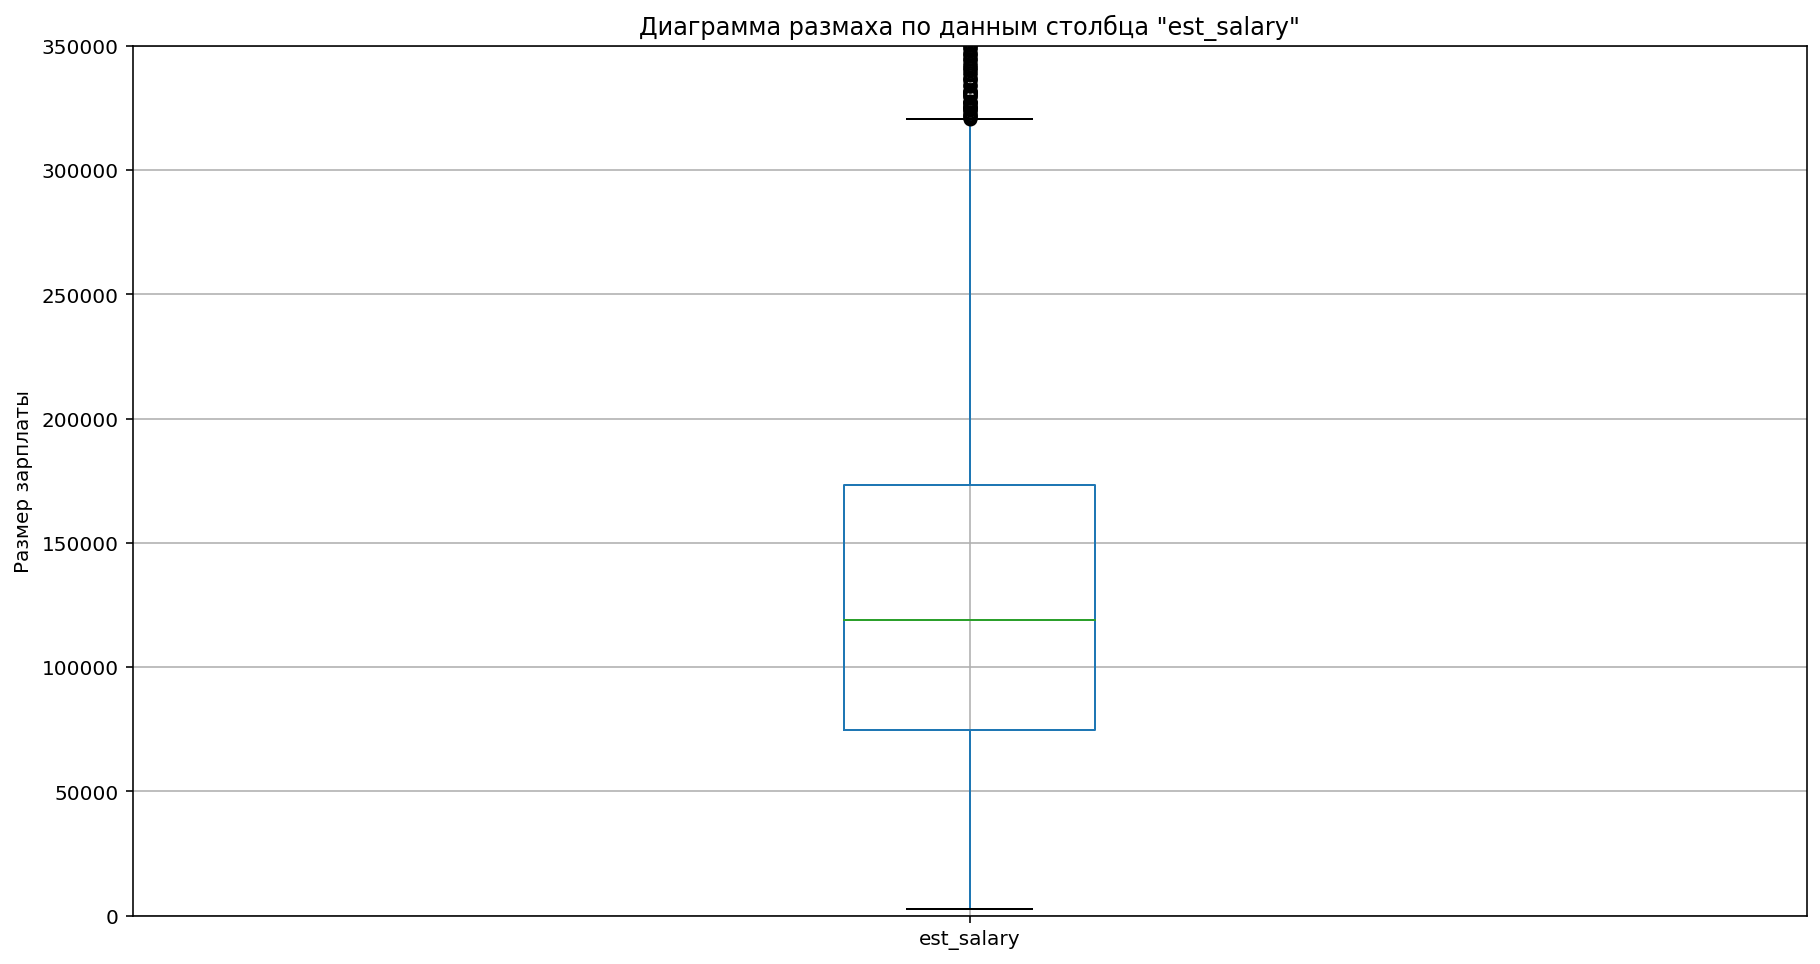

In [34]:
# Построим диаграмму размаха по столбцу 'est_salary'.

ax = data.boxplot('est_salary').set(title='Диаграмма размаха по данным столбца "est_salary"', 
                                ylabel='Размер зарплаты', ylim=(0, 350000))
#ax.set_ylim(0, 350000)

In [35]:
# Посмотрим перцентили по зарплате.

np.percentile(data['est_salary'], [90, 95, 99])

array([237826.3   , 301921.9   , 820348.9655])

In [36]:
# Посчитаем долю клиентов с зарплатой более 882 000.

round(data.loc[data['est_salary'] > 882000, 'userid'].count() / data['userid'].count() * 100)

1

Возьмем 99 перцентиль, зарплата выше 882 тыс. у 1 % пользователей — допустимо удалить.

In [37]:
# Фиксируем число данных до удаления.

data.count()

userid           9796
score            9796
city             9796
gender           9796
age              9796
equity           9796
balance          7537
products         9796
credit_card      9796
last_activity    9796
est_salary       9796
churn            9796
dtype: int64

In [38]:
# Удалим данные о клиентах с зарплатой более 882 тыс.

data = data[~ (data['est_salary'] > 882000)]

In [39]:
# Проверим число данных после удаления.

data.count()

userid           9717
score            9717
city             9717
gender           9717
age              9717
equity           9717
balance          7522
products         9717
credit_card      9717
last_activity    9717
est_salary       9717
churn            9717
dtype: int64

Изначально у нас было 10 тыс. строк, после предобработки осталось 9 718 — суммарно удалили менее 3 %, это допустимо.

<a id='5-bullet'></a>

### Кодирование данных

В данных есть две неупорядоченные категориальные переменные: город филиала и пол. Для анализа они могут потребоваться в закодированном виде.

In [40]:
# Создадим дубликаты столбцов для кодирования и проверим корреткность.

data['city_code'] = data['city']
data['gender_code'] = data['gender']
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_code,gender_code
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,Ярославль,М


In [41]:
# Закодируем пол и город филиала.

data = pd.get_dummies(data, columns = ['city_code', 'gender_code'])
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_code_Ростов,city_code_Рыбинск,city_code_Ярославль,gender_code_Ж,gender_code_М
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


В рамках предобработки данных были скорректированы названия столбцов, проверена корректность возраста, баллов скоринга и недвижимости, изучены и частично удалены данные с пропусками и дубликатами, удалены выбросы в размере баланса и зарплаты.

Проведено кодирование категориальных переменных.

## Исследовательский анализ данных

<a id='6-bullet'></a>

### География клиентов

In [42]:
# Посчитаем распределение клиентов по филиалам.

city = data.groupby('city')['userid'].count().reset_index()
city['%'] = round(city['userid'] / city['userid'].sum() * 100)
city

,city,userid,%
0,Ростов,1412,15.0
1,Рыбинск,2617,27.0
2,Ярославль,5688,59.0


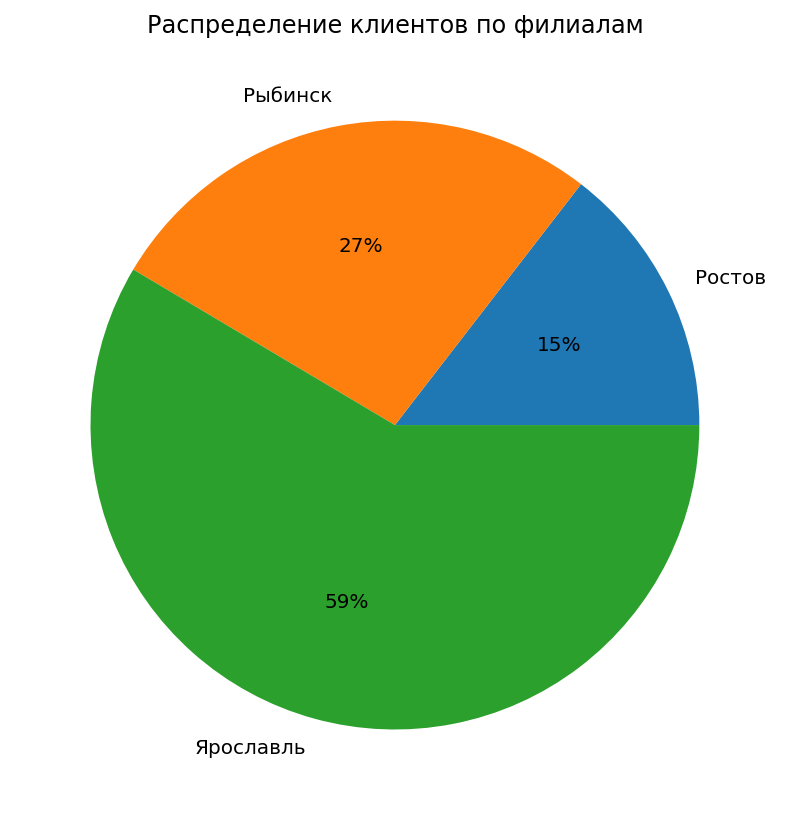

In [43]:
# Для наглядности выведем круговую диаграму.

data.groupby('city')['userid'].count().plot.pie(y='userid', 
                    autopct='%1.0f%%', figsize =(12, 7), legend=False, 
                                               title='Распределение клиентов по филиалам', ylabel='');

Почти 60 % клиентов обслуживаются в головном филиале в Ярославле, 27 % в рыбинском филиале и 15 % в ростовском.

<a id='7-bullet'></a>

### Пол и возраст клиентов

In [44]:
# Посчитаем распределение клиентов по полу.

gender = data.groupby('gender')['userid'].count().reset_index()
gender['%'] = round(gender['userid'] / gender['userid'].sum() * 100)
gender

,gender,userid,%
0,Ж,4867,50.0
1,М,4850,50.0


По полу клиенты распределены строго пополам.

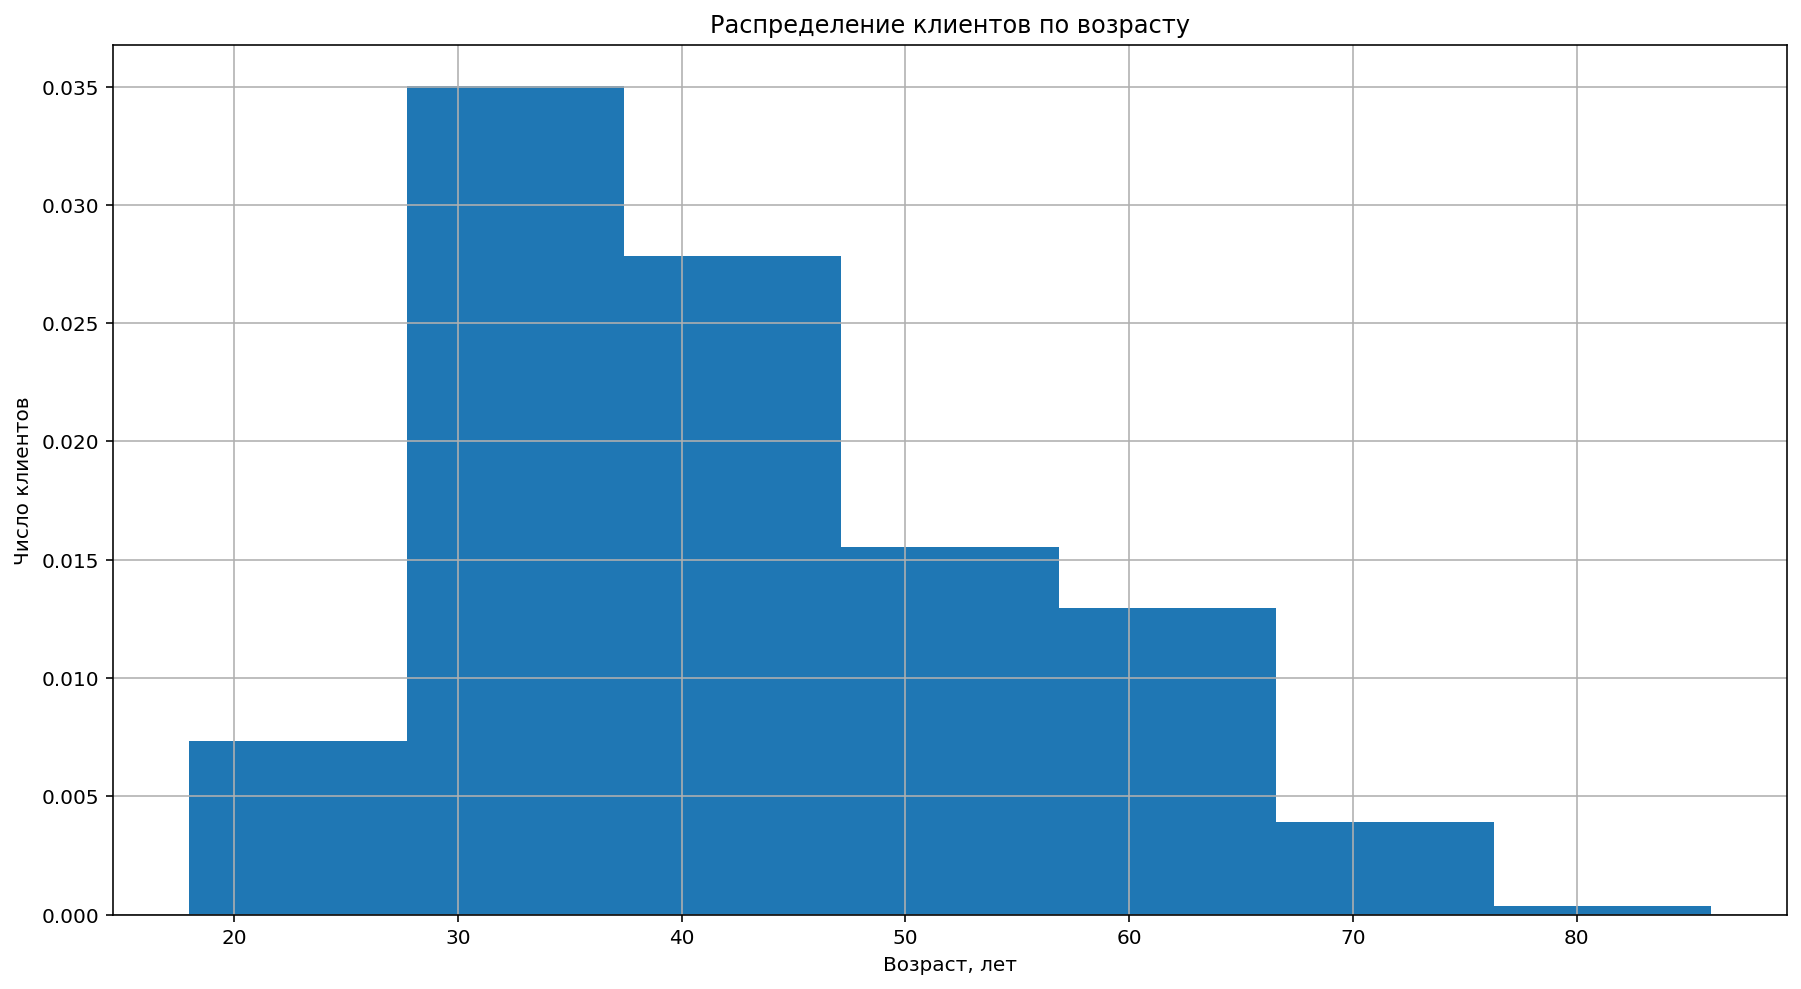

In [45]:
# Построим гистограмму по возрасту клиентов.

data['age'].hist(bins=7, density=True)
#plt.gcf().set_size_inches(15, 8)
plt.title('Распределение клиентов по возрасту')
plt.ylabel('Число клиентов')
plt.xlabel('Возраст, лет');

Больше всего клиентов (примерно треть от всех) в возрасте от 28 до 38 лет, на втором месте от 38 до 48 лет (больше четверти от всех), меньше всего клиентов в возрастных категориях 68-78 лет и 78-88 лет.

<a id='8-bullet'></a>

### Собстенность клиентов

In [46]:
# Сгруппируем данные по баллам собственности.

equity = data.groupby('equity')['userid'].count().reset_index().sort_values(by='userid', ascending=False)
equity['%'] = round(equity['userid'] / equity['userid'].sum() * 100)
equity

,equity,userid,%
0,0,2487,26.0
5,5,1852,19.0
4,4,1796,18.0
3,3,1512,16.0
2,2,1040,11.0
1,1,769,8.0
6,6,156,2.0
7,7,76,1.0
8,8,16,0.0
9,9,13,0.0


У большинства клиентов (26 %) нет собственности, у 19 % пять бвллов (объектов) недвижимости, у 18 % четыре балла (объекта).

<a id='9-bullet'></a>

### Распределение балансов клиентов

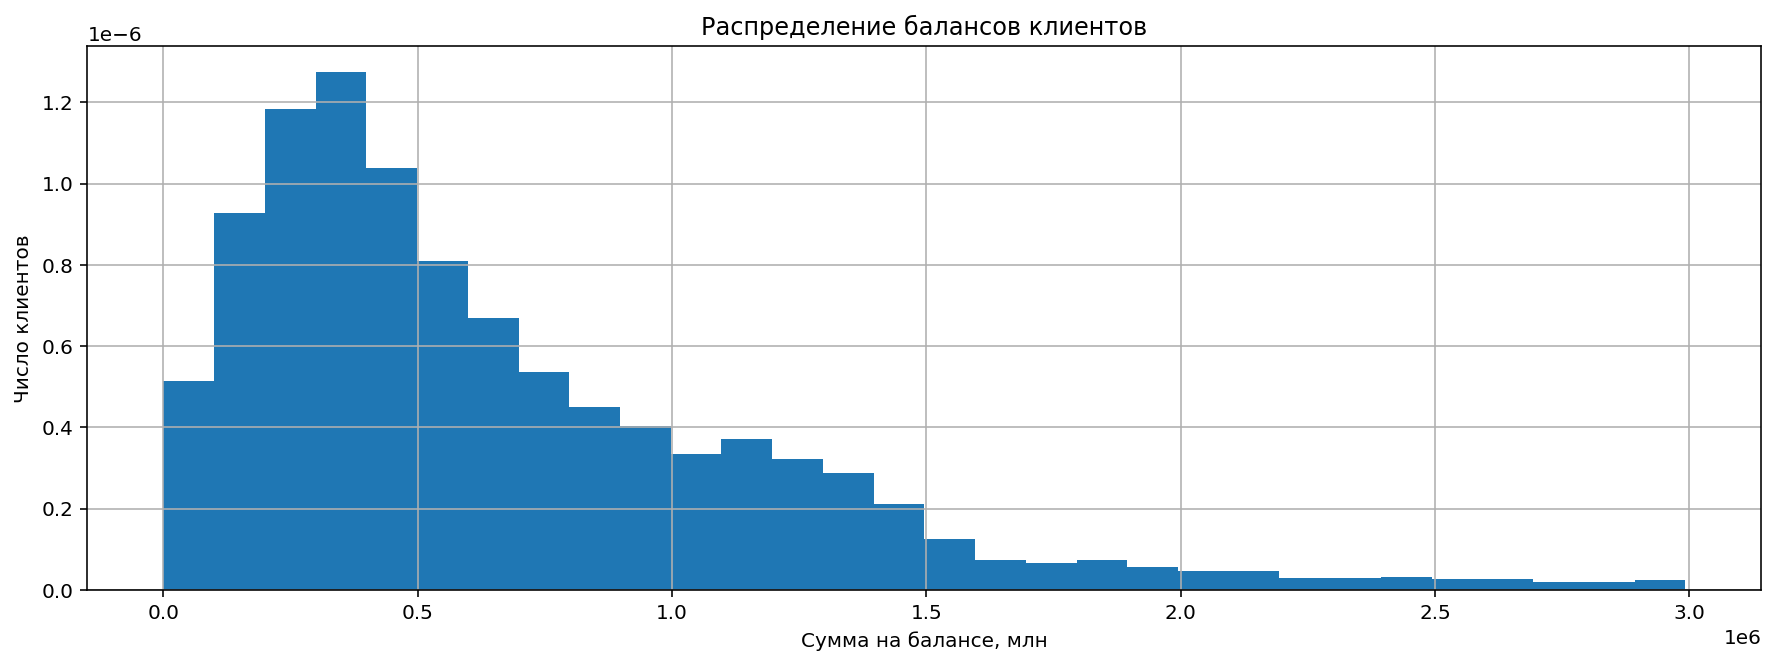

In [47]:
# Построим гистограмму по балансам клиентов. Для наглядности ограничим сумму балансов 3 млн.

data.loc[data['balance'] < 3000000, 'balance'].hist(bins=30, density=True)
plt.gcf().set_size_inches(15, 5)
plt.title('Распределение балансов клиентов')
plt.ylabel('Число клиентов')
plt.xlabel('Сумма на балансе, млн');

Больше всего клиентов с балансом от 300 до 400 тыс. На втором месте клиенты с балансом от 200 до 300 тыс.

<a id='10-bullet'></a>

### Распределение числа продуктов у клиентов

In [48]:
# Сгруппируем данные по числу продуков.

products = data.groupby('products')['userid'].count().reset_index().sort_values(by='userid', ascending=False)
products['%'] = round(products['userid'] / products['userid'].sum() * 100)
products

,products,userid,%
1,2,5004,51.0
0,1,3242,33.0
2,3,1004,10.0
3,4,449,5.0
4,5,18,0.0


Больше всего (51 %) клиентов с двумя продуктами, у трети клиентов один продукт, три продукта у 10 % клиентов.

<a id='11-bullet'></a>

### Анализ наличия кредитных карт

In [49]:
# Посчитаем распределение клиентов по наличию или отсутсвию кредитного продукта.

credit_card = data.groupby('credit_card')['userid'].count().reset_index()
credit_card['%'] = round(credit_card['userid'] / credit_card['userid'].sum() * 100)
credit_card

,credit_card,userid,%
0,0,3104,32.0
1,1,6613,68.0


У большинства клиентов (68 %) есть кредитная карта, примерно у трети клиентов кредитной карты нет.

<a id='12-bullet'></a>

### Анализ уровня заработной платы клиентов

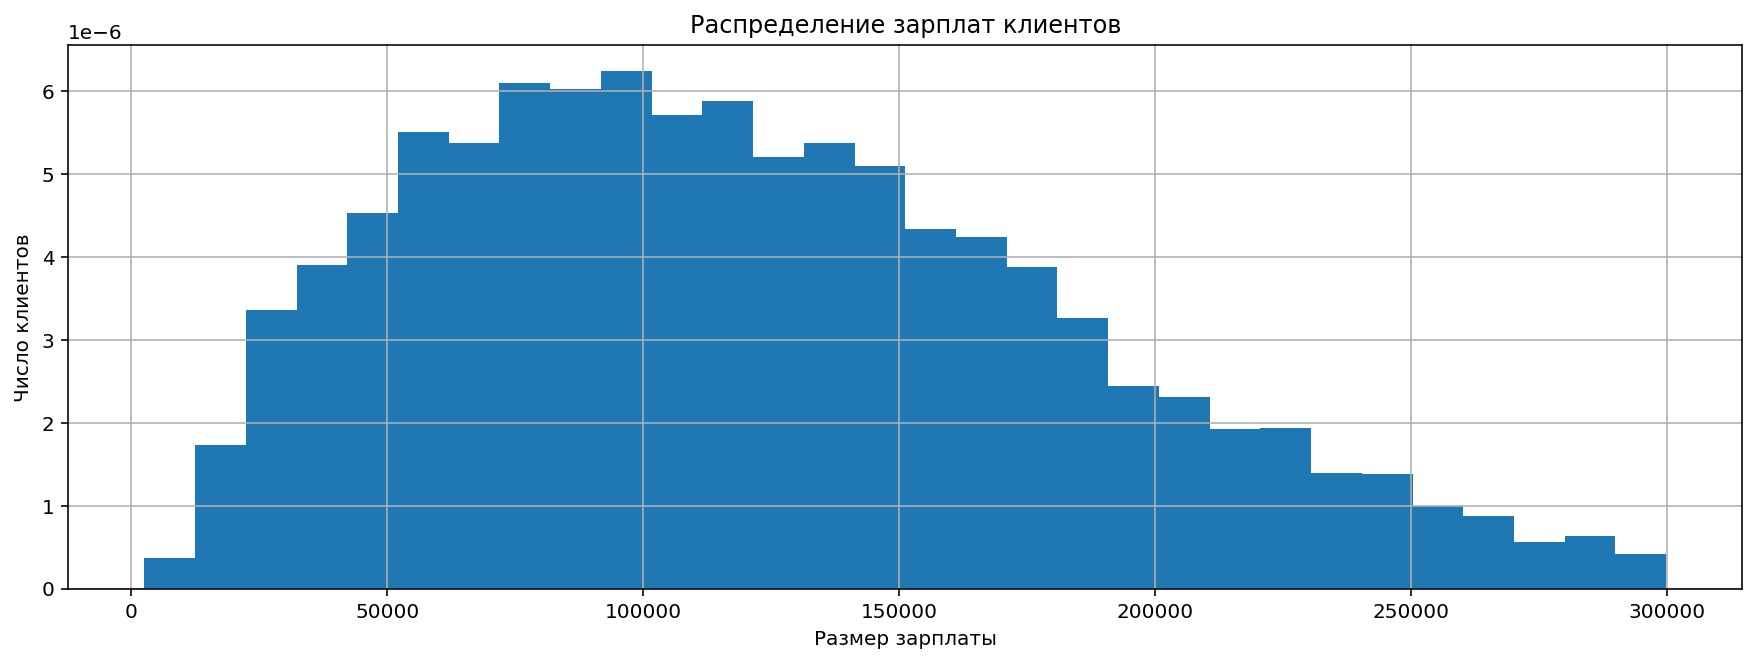

In [50]:
# Построим гистограмму по зарплате. Для наглядности ограничим сумму балансов 300 тыс.

data.loc[data['est_salary'] < 300000, 'est_salary'].hist(bins=30, density=True)
plt.gcf().set_size_inches(15, 5)
plt.title('Распределение зарплат клиентов')
plt.ylabel('Число клиентов')
plt.xlabel('Размер зарплаты');

У большинства клиентов зарплата от 70 до 120 тыс. 

<a id='13-bullet'></a>

### Анализ баллов скоринга

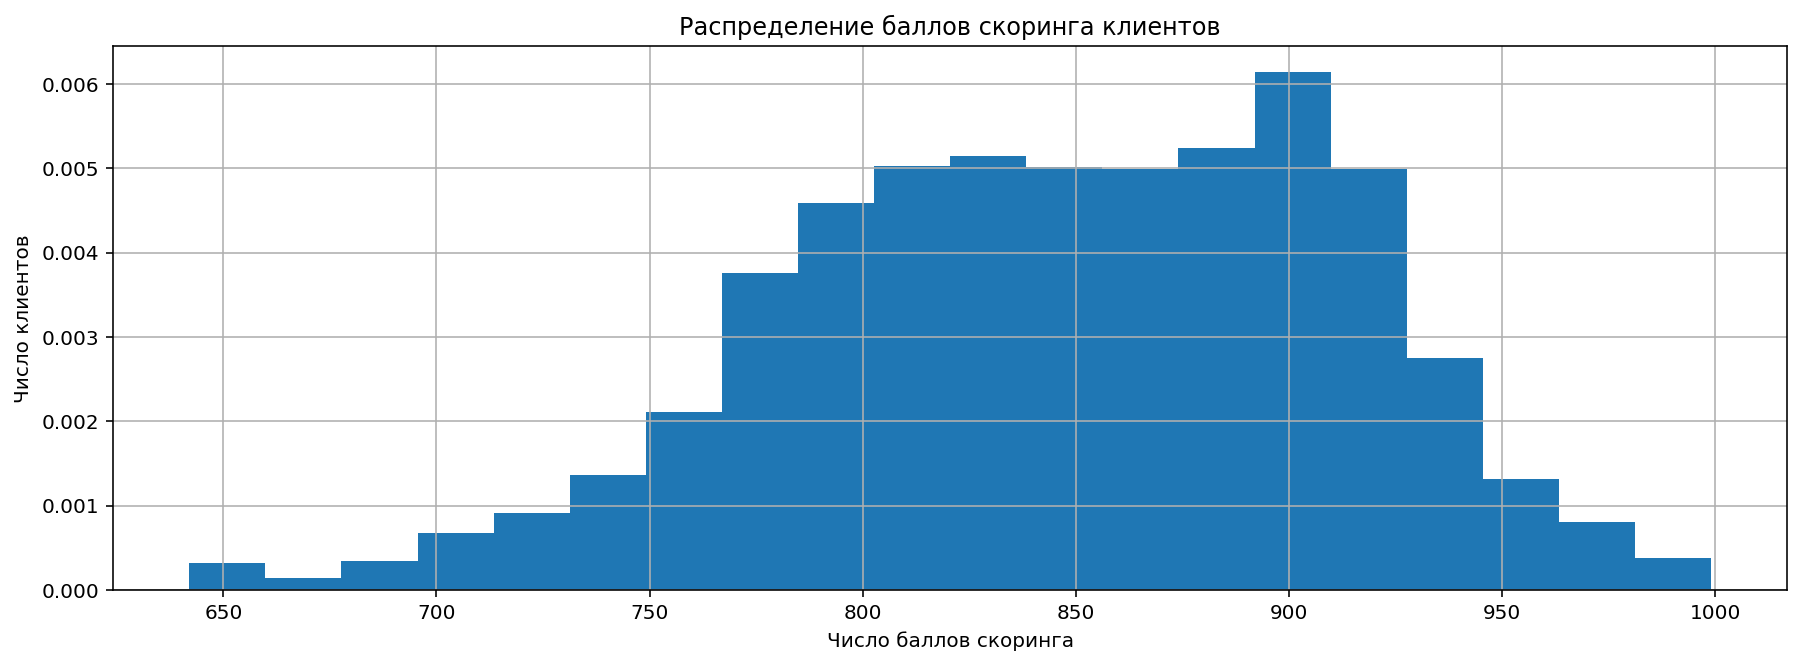

In [51]:
# Построим гистограмму по баллам скоринга. Для наглядности ограничим сумму балансов 3 млн.

data['score'].hist(bins=20, density=True)
plt.gcf().set_size_inches(15, 5)
plt.title('Распределение баллов скоринга клиентов')
plt.ylabel('Число клиентов')
plt.xlabel('Число баллов скоринга');

Больше всего клиентов с баллами около 900, что хорошо характерихует клиентов банка. При этом большинство клиентов с баллами скоринга меньше 900.

<a id='14-bullet'></a>

### Анализ активности клиентов

In [52]:
# Посчитаем распределение клиентов по активности.

last_activity = data.groupby('last_activity')['userid'].count().reset_index()
last_activity['%'] = round(last_activity['userid'] / last_activity['userid'].sum() * 100)
last_activity

,last_activity,userid,%
0,0,4649,48.0
1,1,5068,52.0


Активные и неактивные клиенты распределены почти поровну: 52 % активных и 48 % неактивных.

Почти 60 % клиентов банка обслуживаются в головном филиале в Ярославле, 27 % в Рыбинске, 15 % в Ростове.
Мужчин и женщин среди клиентов банка практически поровну.
Больше всего клиентов (примерно треть от всех) в возрасте от 28 до 38 лет, на втором месте возрастная группа от 38 до 48 лет (больше четверти от всех), меньше всего клиентов в возрастных категориях 68-78 лет и 78-88 лет.
У большинства клиентов (26 %) нет собственности, у 19 % пять бвллов (объектов) недвижимости, у 18 % четыре балла (объекта).
Больше всего клиентов с балансом от 300 до 400 тыс. На втором месте клиенты с балансом от 200 до 300 тыс.
Больше всего (51 %) клиентов с двумя продуктами, у трети клиентов один продукт, три продукта у 10 % клиентов.
У большинства клиентов зарплата от 70 до 120 тыс. 
Больше всего клиентов с баллами около 900, что хорошо характерихует клиентов банка. При этом большинство клиентов с баллами скоринга меньше 900.

В целом для регионального банка у «Метанпром» хорошая клиентская база: относительно молодой возраст, и мужчины, и женщины, с доходами и балансами выше среднего по стране, имеющие объекты недвижимости и пользуещиеся несколькими продуктами.
Однако заметна невысокая активность пользователей — возможно, значительная часть клиентов — вкладчики, которые кладут деньги, для этого получают банковскую карту (два продукта) и фактически услугаими банка не пользуются — получается, являются расходной, а не доходной частью бизнеса.

## Сравнение клиентов склонных и несклонных уходить

<a id='15-bullet'></a>

### География клиентов

In [53]:
# Посчитаем распределение ушедших и не ушедших клиентов по филиалам.

city_churn = data.groupby('city').agg({'userid':'count', 'churn':'sum'}).reset_index()
city_churn['not_churn'] = city_churn['userid'] - city_churn['churn']
city_churn['%'] = round(city_churn['userid'] / city_churn['userid'].sum() * 100)
city_churn['churn_%'] = round(city_churn['churn'] / city_churn['churn'].sum() * 100)
city_churn['not_churn_%'] = round(city_churn['not_churn'] / city_churn['not_churn'].sum() * 100)
city_churn

,city,userid,churn,not_churn,%,churn_%,not_churn_%
0,Ростов,1412,263,1149,15.0,15.0,14.0
1,Рыбинск,2617,410,2207,27.0,24.0,28.0
2,Ярославль,5688,1063,4625,59.0,61.0,58.0


Есть лишь небольшое отличие: доля ушедших из рыбинского филиала ниже на 3 %, чем доля клиентов данного филиала в общем числе клиентов. В Ярославле доля набоборот выше.

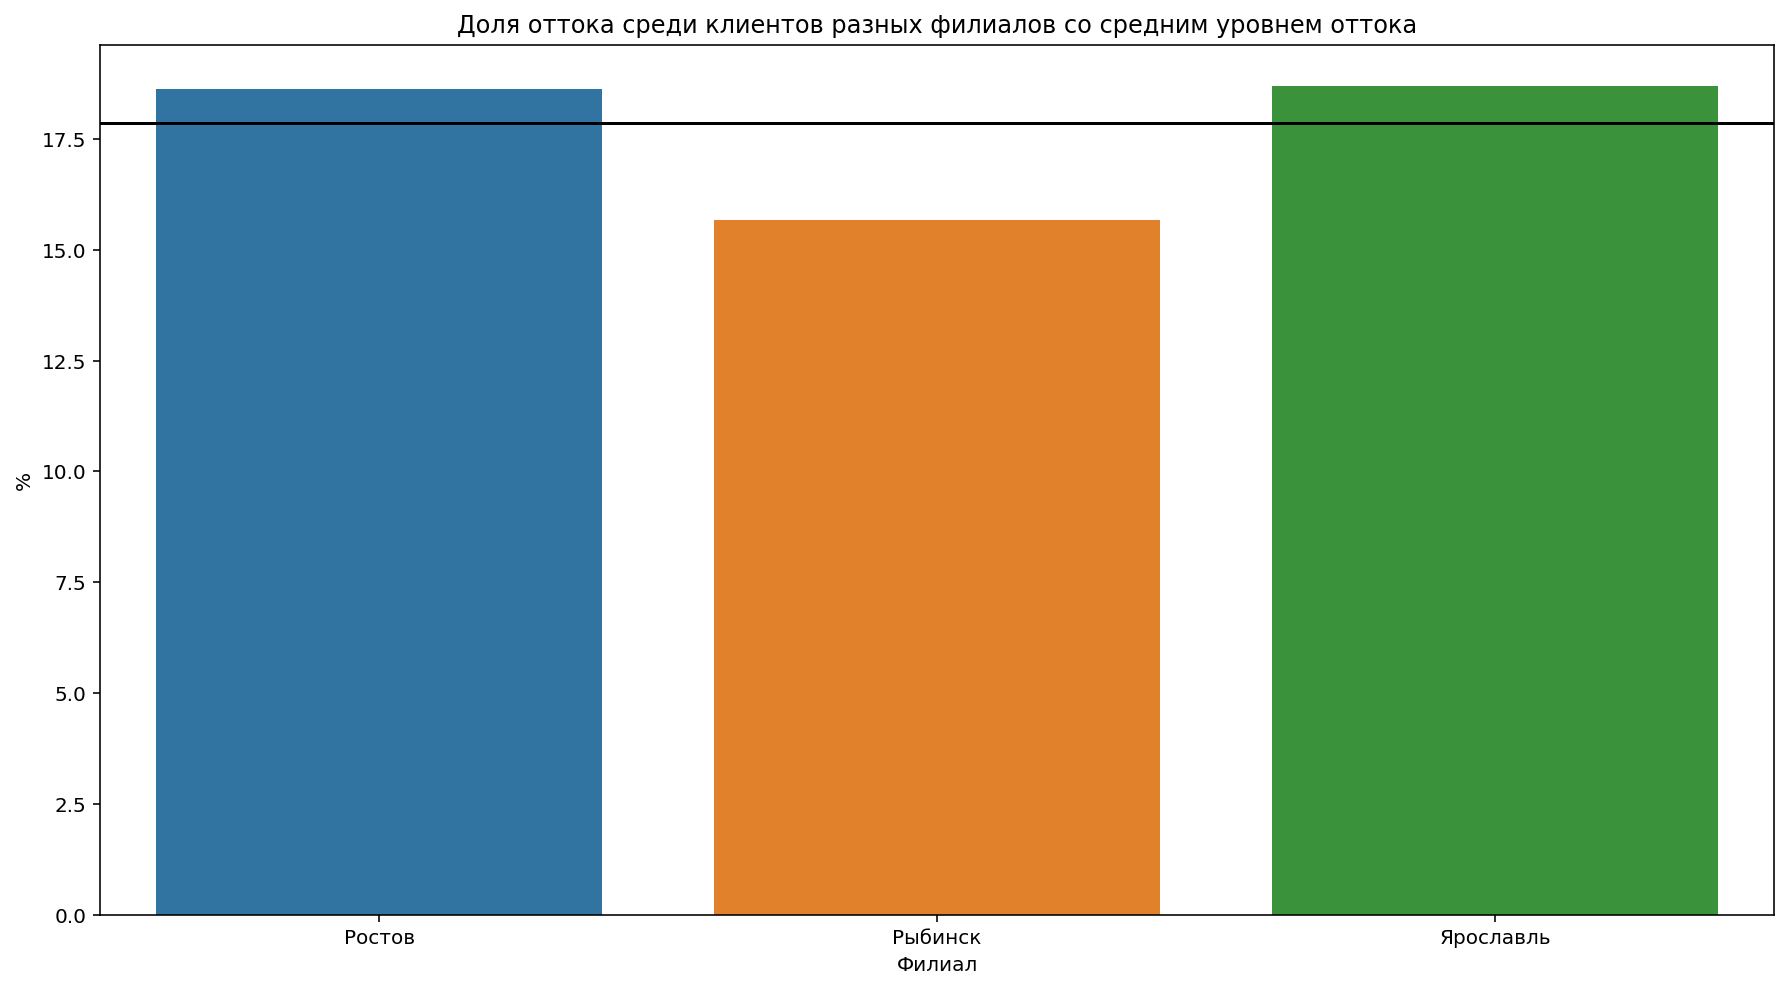

In [54]:
# Посчитаем долю оттока среди клиентов разных филиалов.
city_gr = data.groupby('city')['churn'].mean().reset_index()
city_gr['churn'] = city_gr['churn']*100

# Визуализируем.
ax = sns.barplot(x=city_gr['city'], y=city_gr['churn'])
ax.axhline(data['churn'].mean()*100, color='black')
ax.set(title='Доля оттока среди клиентов разных филиалов со средним уровнем оттока', xlabel='Филиал', ylabel='%')
plt.show()

<a id='16-bullet'></a>

### Пол и возраст клинетов

In [55]:
# Посчитаем распределение ушедших и не ушедших клиентов по полу.

age_churn = data.loc[data['churn'] == 1].groupby('gender')['userid'].count().reset_index()
age_churn['%'] = round(age_churn['userid'] / age_churn['userid'].sum() * 100)

age_not_churn = data.loc[data['churn'] == 0].groupby('gender')['userid'].count().reset_index()
age_not_churn['%'] = round(age_not_churn['userid'] / age_not_churn['userid'].sum() * 100)
                         
print(age_churn)
age_not_churn

  gender  userid     %
0      Ж     608  35.0
1      М    1128  65.0


,gender,userid,%
0,Ж,4259,53.0
1,М,3722,47.0


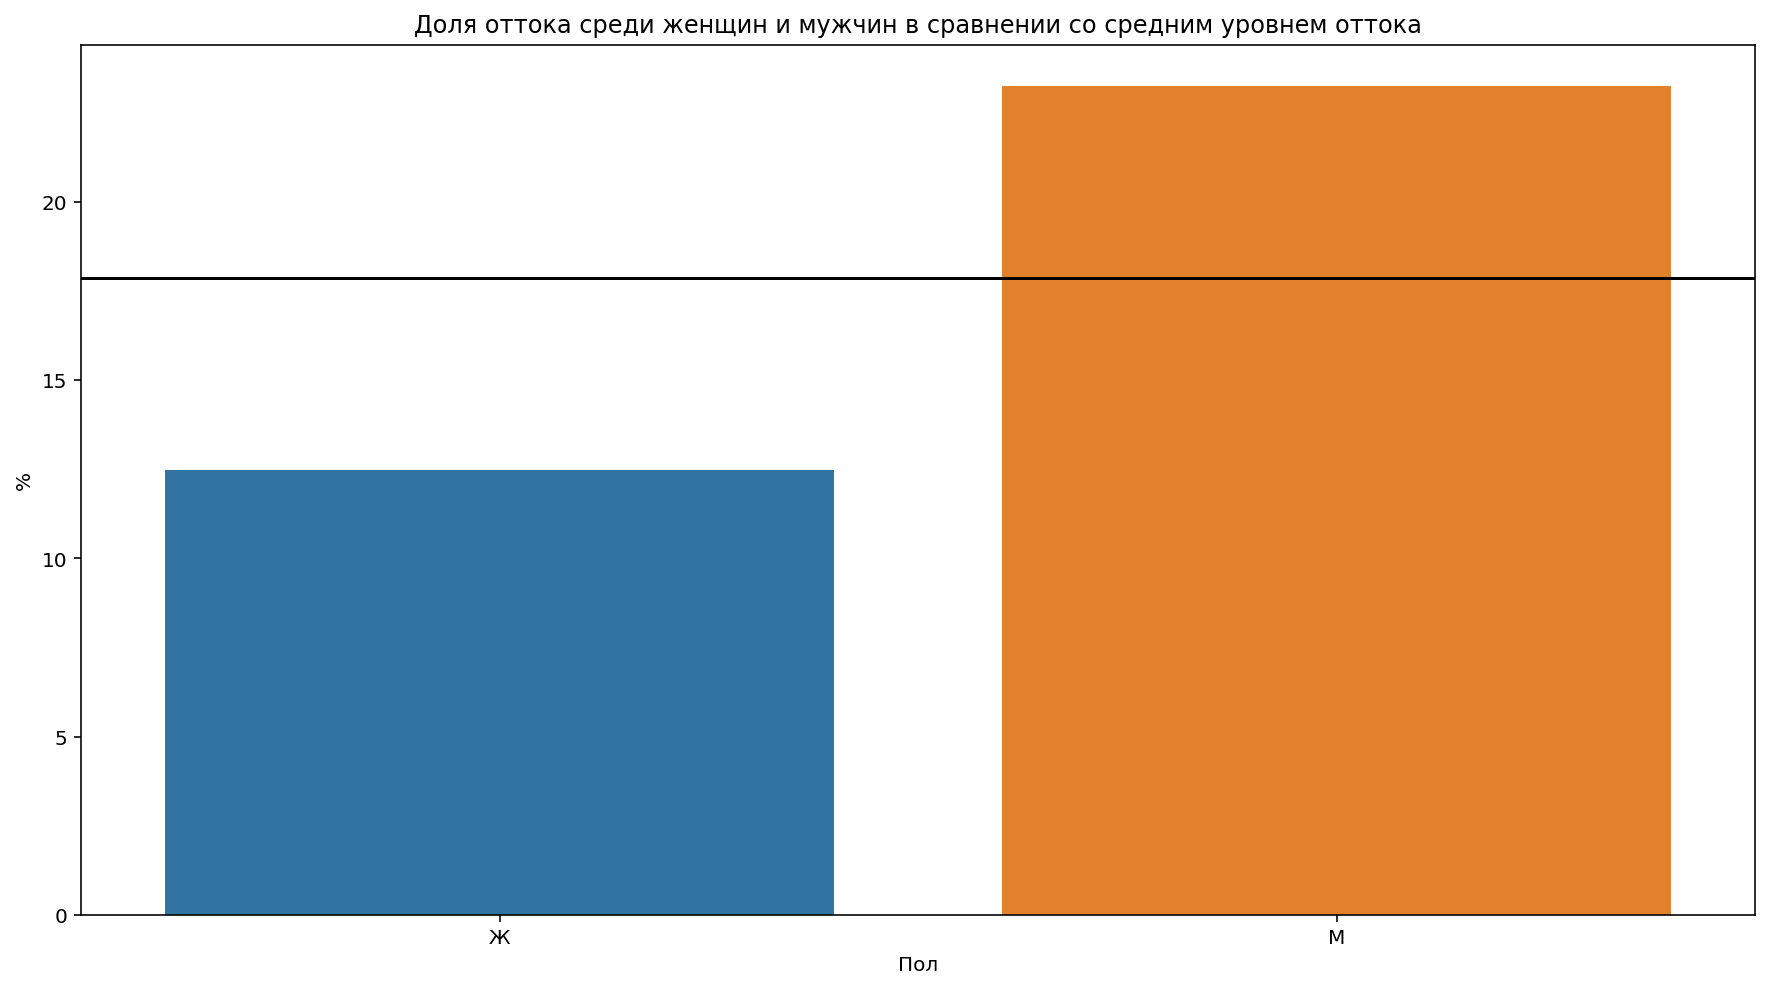

In [56]:
# Посчитаем долю оттока среди женщин и мужчин.
age_gr = data.groupby('gender')['churn'].mean().reset_index()
age_gr['churn'] = age_gr['churn']*100

# Визуализируем.
ax = sns.barplot(x=age_gr['gender'], y=age_gr['churn'])
ax.axhline(data['churn'].mean()*100, color='black')
ax.set(title='Доля оттока среди женщин и мужчин в сравнении со средним уровнем оттока', xlabel='Пол', ylabel='%')
plt.show()

На графике наглядно видно, что доля отточных клиентов среди мужчин выше, чем среди женщин, отток среди женщин ниже среднего по банку, а среди мужчин выше.

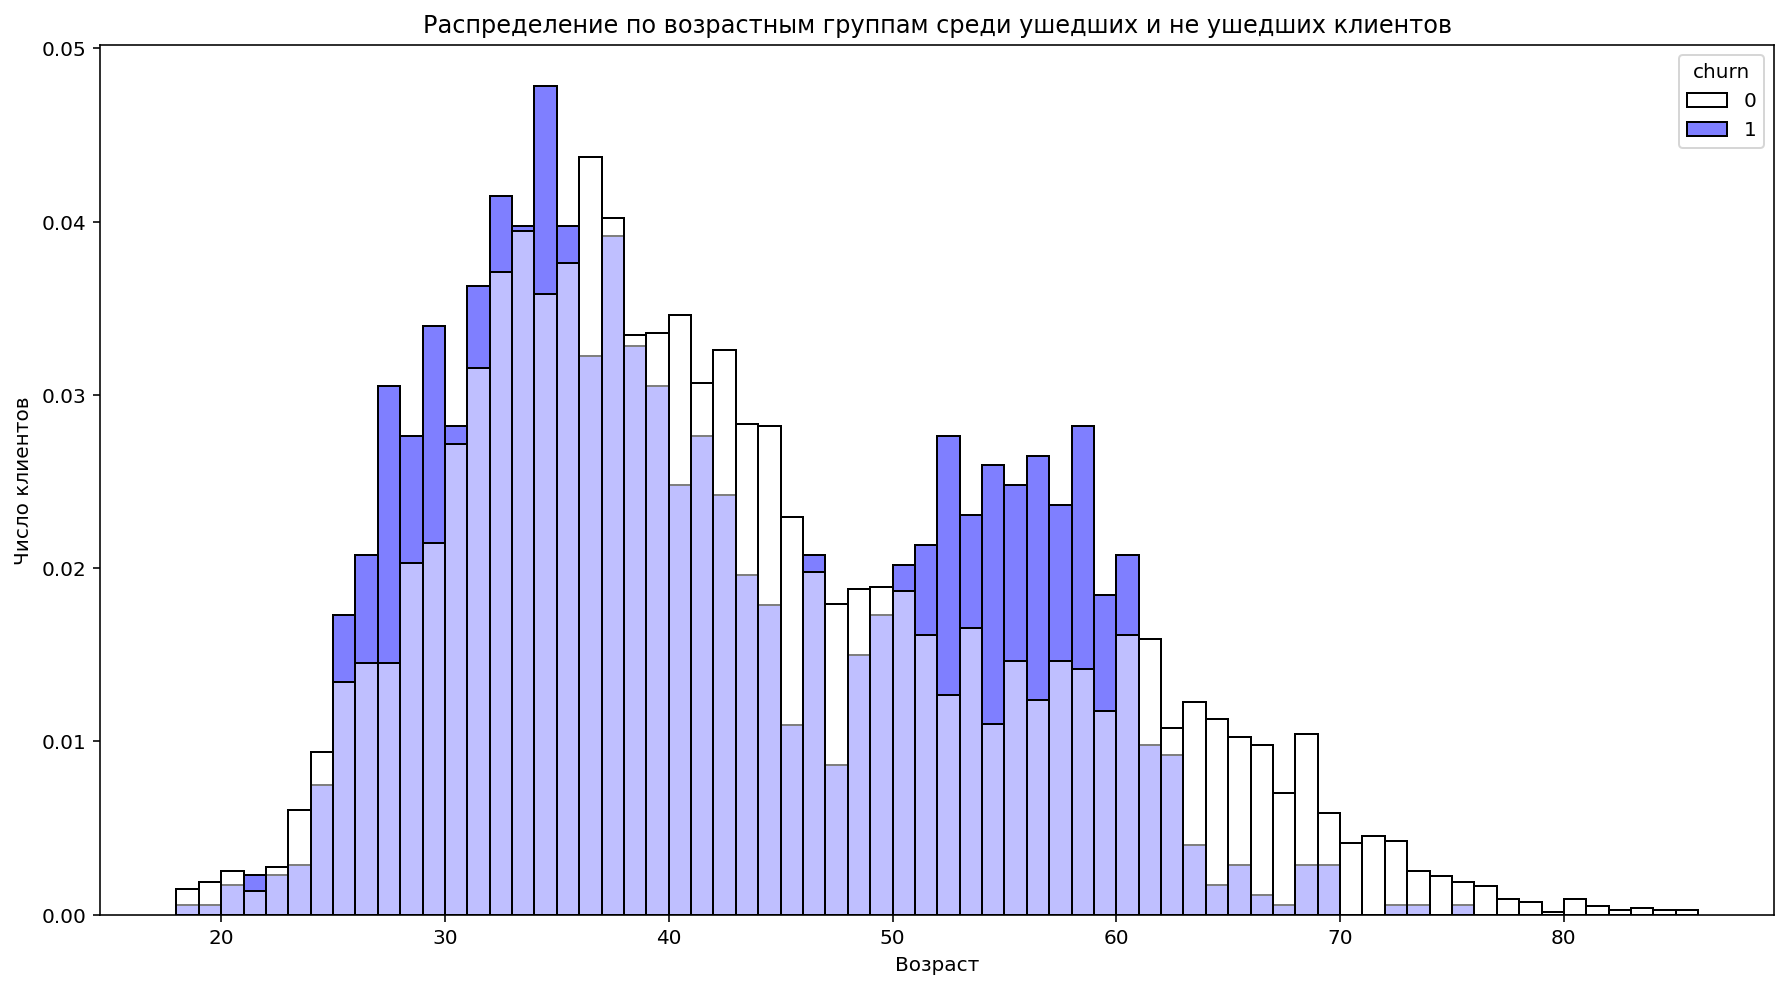

In [57]:
# Посмотрим распределение по возрастным грппам среди ушедших и не ушедших.

(
sns.histplot(data=data, hue='churn', x='age', common_norm=False, stat='density', palette='flag', binwidth=1)
    .set(title='Распределение по возрастным группам среди ушедших и не ушедших клиентов', 
         xlabel='Возраст', ylabel='Число клиентов')
);

На графике видно, что отток выше в группах 25-35 и 50-60 лет.

<a id='17-bullet'></a>

### Собственность клиентов

In [58]:
# Посчитаем распределение ушедших и не ушедших клиентов по баллам собственности.

equity_churn = data.loc[data['churn'] == 1].groupby('equity')['userid'].count().reset_index()
equity_churn['%'] = round(equity_churn['userid'] / equity_churn['userid'].sum() * 100)

equity_not_churn = data.loc[data['churn'] == 0].groupby('equity')['userid'].count().reset_index()
equity_not_churn['%'] = round(equity_not_churn['userid'] / equity_not_churn['userid'].sum() * 100)

print('churn')
print(equity_churn)

print('not_churn')
equity_not_churn

churn
   equity  userid     %
0       0      86   5.0
1       1      91   5.0
2       2     164   9.0
3       3     308  18.0
4       4     442  25.0
5       5     544  31.0
6       6      54   3.0
7       7      34   2.0
8       8       6   0.0
9       9       7   0.0
not_churn


,equity,userid,%
0,0,2401,30.0
1,1,678,8.0
2,2,876,11.0
3,3,1204,15.0
4,4,1354,17.0
5,5,1308,16.0
6,6,102,1.0
7,7,42,1.0
8,8,10,0.0
9,9,6,0.0


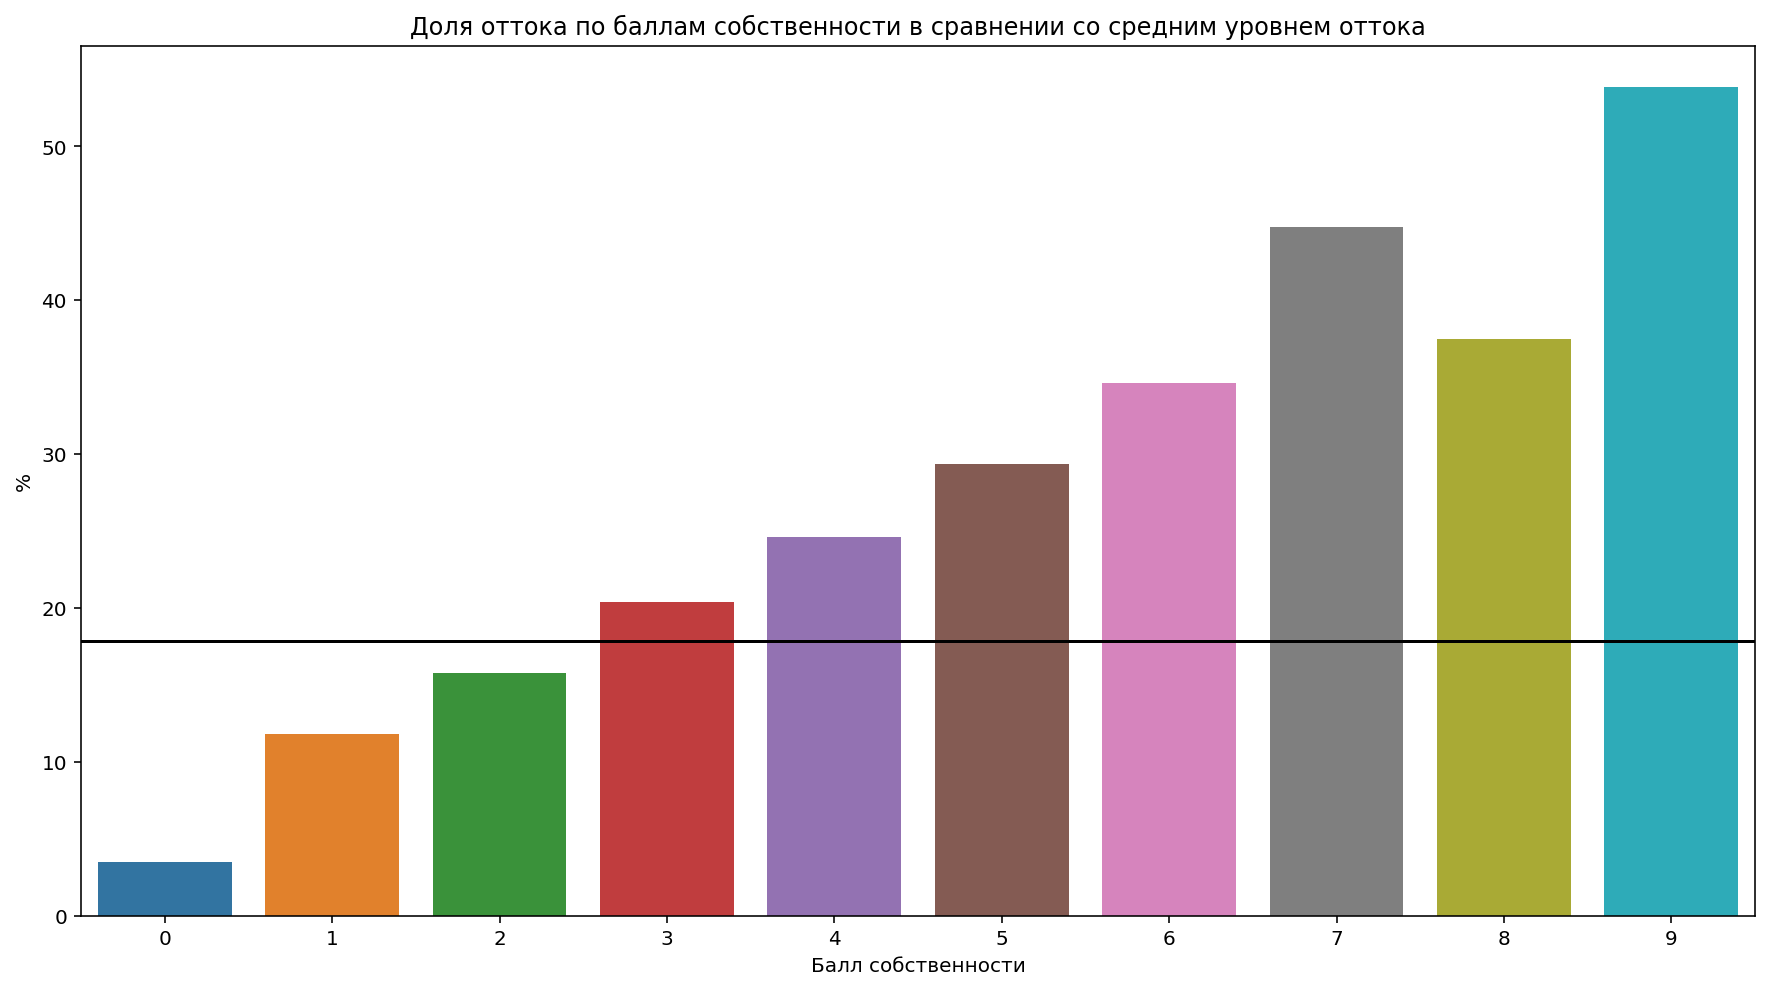

In [59]:
# Посчитаем долю оттока по баллам собственности.
equity_gr = data.groupby('equity')['churn'].mean().reset_index()
equity_gr['churn'] = equity_gr['churn']*100

# Визуализируем.
ax = sns.barplot(x=equity_gr['equity'], y=equity_gr['churn'])
ax.axhline(data['churn'].mean()*100, color='black')
ax.set(title='Доля оттока по баллам собственности в сравнении со средним уровнем оттока', 
       xlabel='Балл собственности', ylabel='%')
plt.show()



На графике видно, что среди клиентов с баллами собственности 0-2 отток ниже среднебанковского, в остальных группах он выше — максимальный уровень оттока среди клиентов с баллами собственности 7-9.

<a id='18-bullet'></a>

### Баланс клиентов

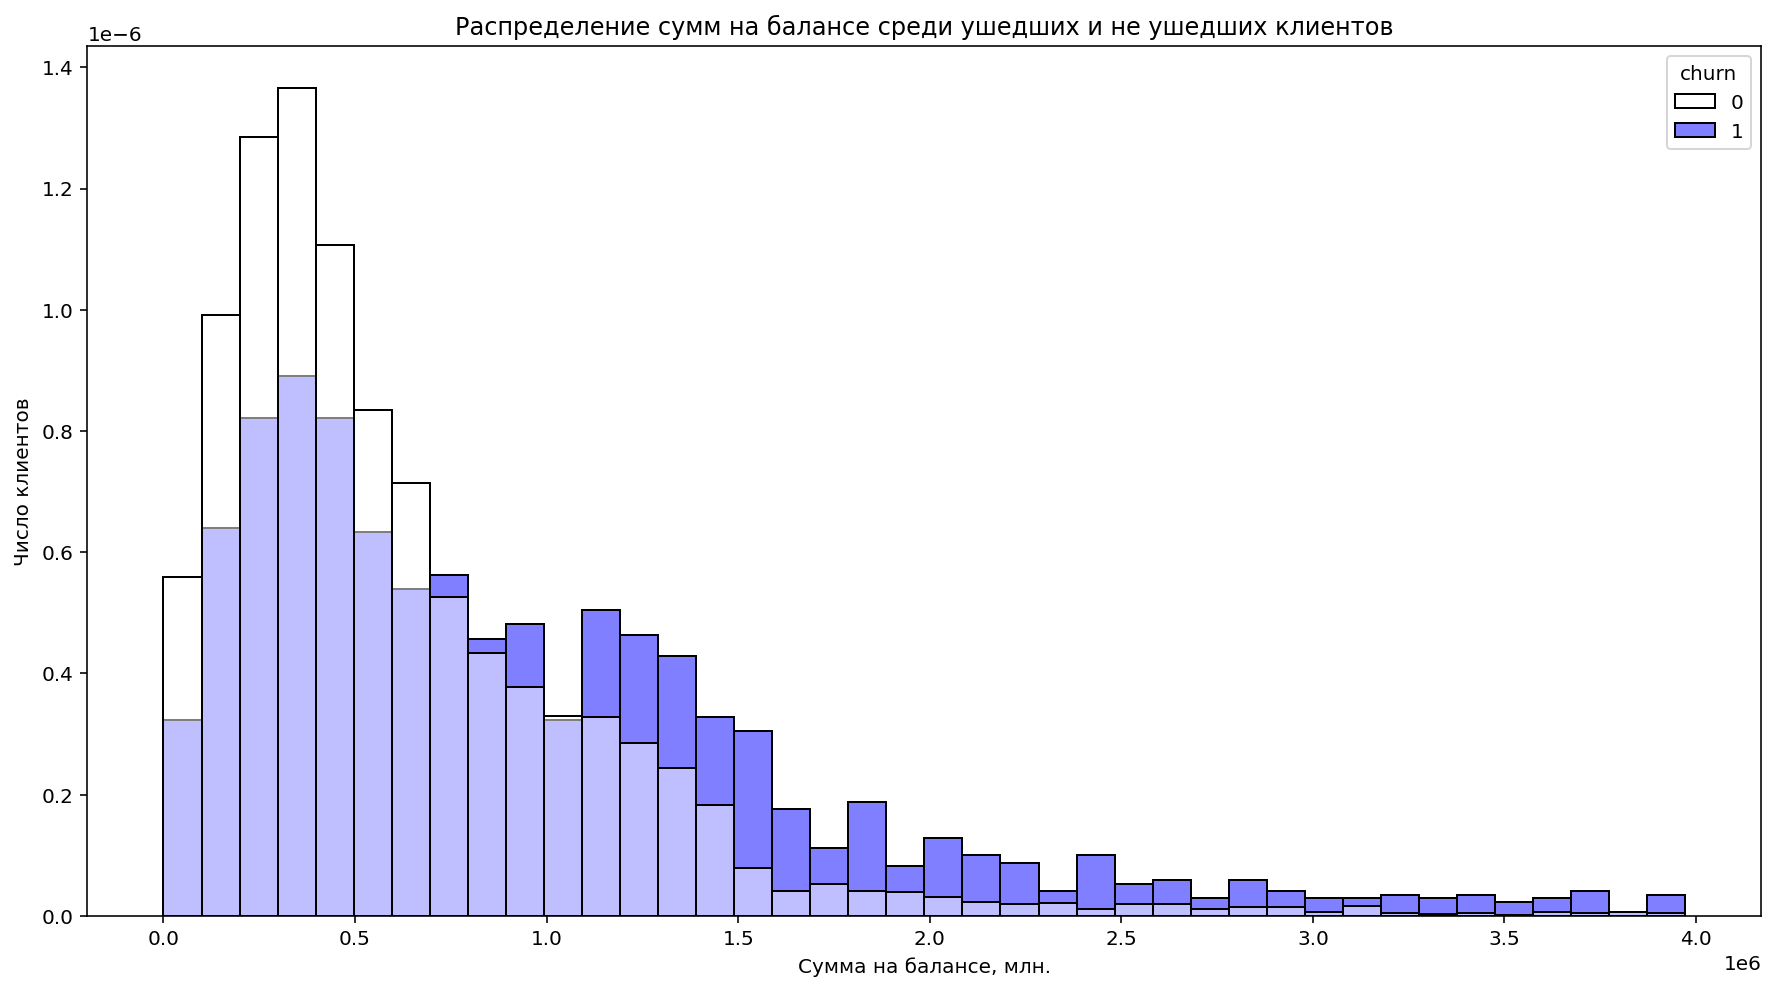

In [60]:
# Посмотрим распределение сумм на балансе среди ушедших и не ушедших. Для наглядности ограничим 4 млн.

(
sns.histplot(data=data.loc[data['balance'] < 4000000], 
             hue='churn', x='balance', stat='density', common_norm=False, palette='flag', bins=40)
             .set(title='Распределение сумм на балансе среди ушедших и не ушедших клиентов', 
         xlabel='Сумма на балансе, млн.', ylabel='Число клиентов')
);

На графике видно, что в группах клиентов с суммой на балансе больше 700 тыс. (с исключением около 1 млн.) отточных клиентов больше.

<a id='19-bullet'></a>

### Число продуктов клиентов

In [61]:
# Посчитаем распределение ушедших и не ушедших клиентов по числу продуктов.

products_churn = data.loc[data['churn'] == 1].groupby('products')['userid'].count().reset_index()
products_churn['%'] = round(products_churn['userid'] / products_churn['userid'].sum() * 100)

products_not_churn = data.loc[data['churn'] == 0].groupby('products')['userid'].count().reset_index()
products_not_churn['%'] = round(products_not_churn['userid'] / products_not_churn['userid'].sum() * 100)

print('churn')
print(products_churn)

print('not_churn')
products_not_churn

churn
   products  userid     %
0         1     227  13.0
1         2     936  54.0
2         3     287  17.0
3         4     279  16.0
4         5       7   0.0
not_churn


,products,userid,%
0,1,3015,38.0
1,2,4068,51.0
2,3,717,9.0
3,4,170,2.0
4,5,11,0.0


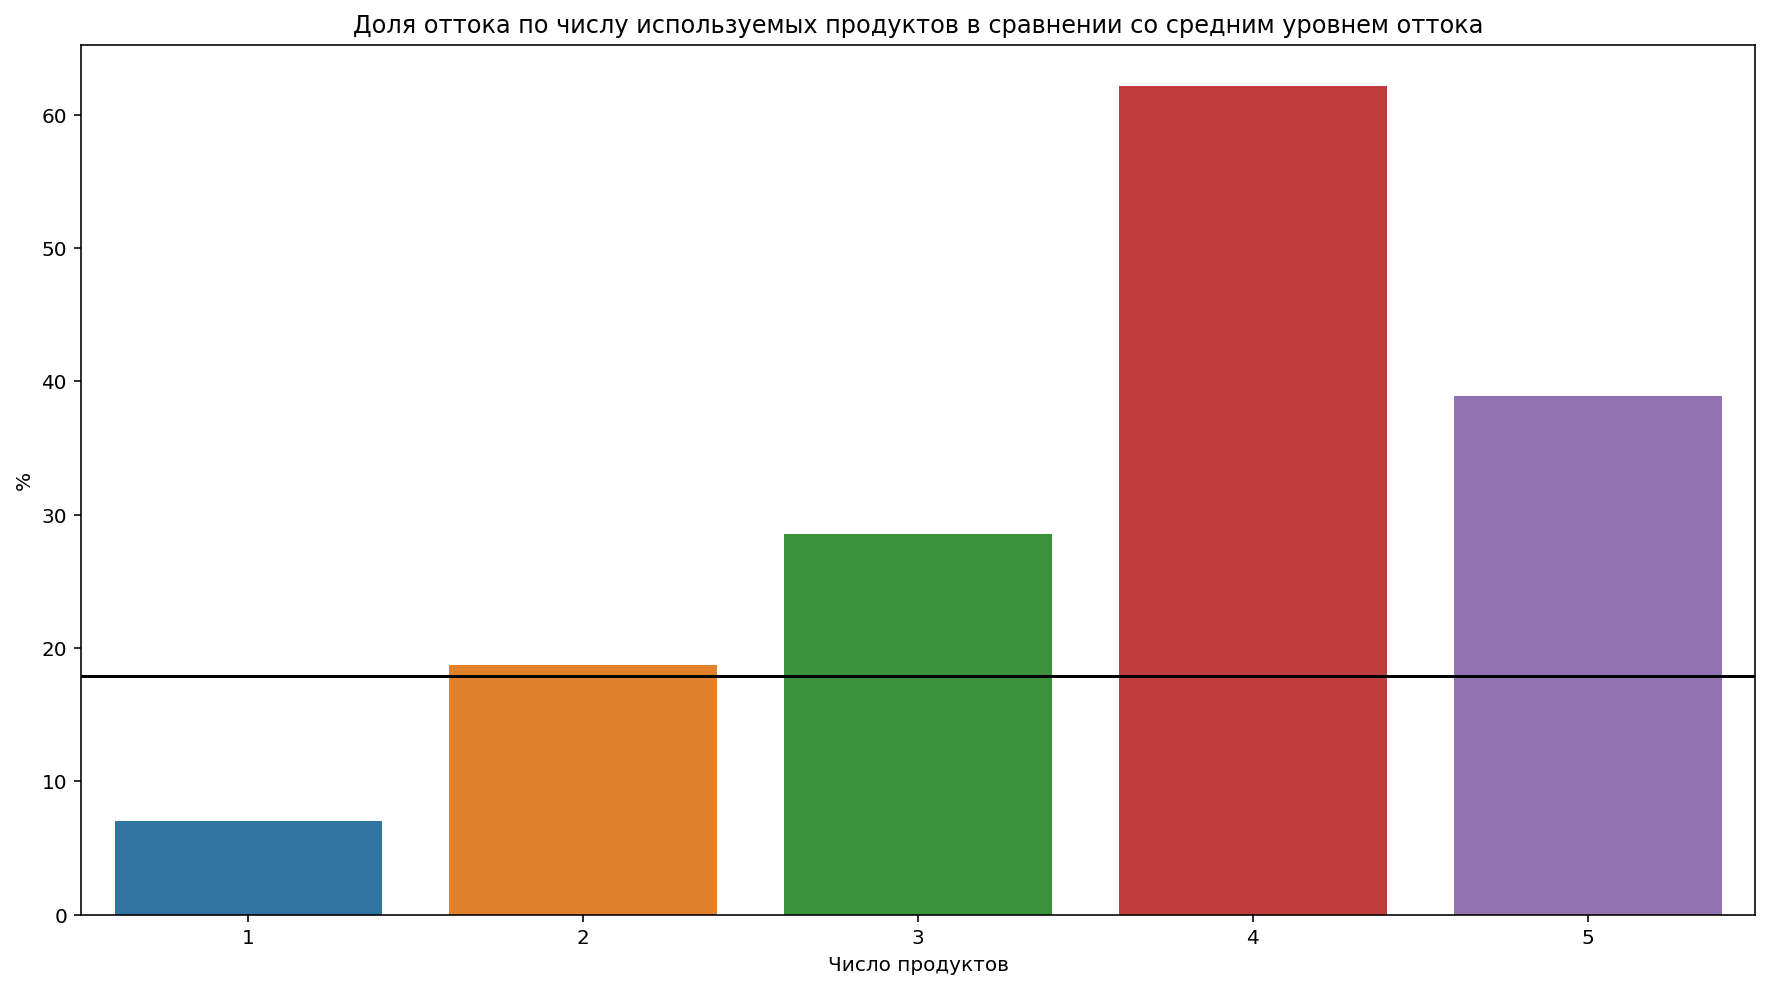

In [62]:
# Посчитаем долю оттока по баллам собственности.
products_gr = data.groupby('products')['churn'].mean().reset_index()
products_gr['churn'] = products_gr['churn']*100

# Визуализируем.
ax = sns.barplot(x=products_gr['products'], y=products_gr['churn'])
ax.axhline(data['churn'].mean()*100, color='black')
ax.set(title='Доля оттока по числу используемых продуктов в сравнении со средним уровнем оттока', 
       xlabel='Число продуктов', ylabel='%')
plt.show()

На графике видно, что среди клиентов с одним продуктов доля оттока ниже среднебанковского, в других группах она выше, максимальная — среди клиентов с четырьмя продуктами.

<a id='20-bullet'></a>

### Наличие кредитных карт

In [63]:
# Посчитаем распределение ушедших и не ушедших клиентов по наличию или отсутсвию кредитных карт.

credit_card_churn = data.loc[data['churn'] == 1].groupby('credit_card')['userid'].count().reset_index()
credit_card_churn['%'] = round(credit_card_churn['userid'] / credit_card_churn['userid'].sum() * 100)

credit_card_not_churn = data.loc[data['churn'] == 0].groupby('credit_card')['userid'].count().reset_index()
credit_card_not_churn['%'] = round(credit_card_not_churn['userid'] / credit_card_not_churn['userid'].sum() * 100)

print('churn')
print(credit_card_churn)
print('not_churn')
credit_card_not_churn

churn
   credit_card  userid     %
0            0     777  45.0
1            1     959  55.0
not_churn


,credit_card,userid,%
0,0,2327,29.0
1,1,5654,71.0


Среди ушедших клиентов кредитная карта была у 55 %, не было у 45 %, среди оставшихся у 71 % есть кредитная карта, у 29 % нет.

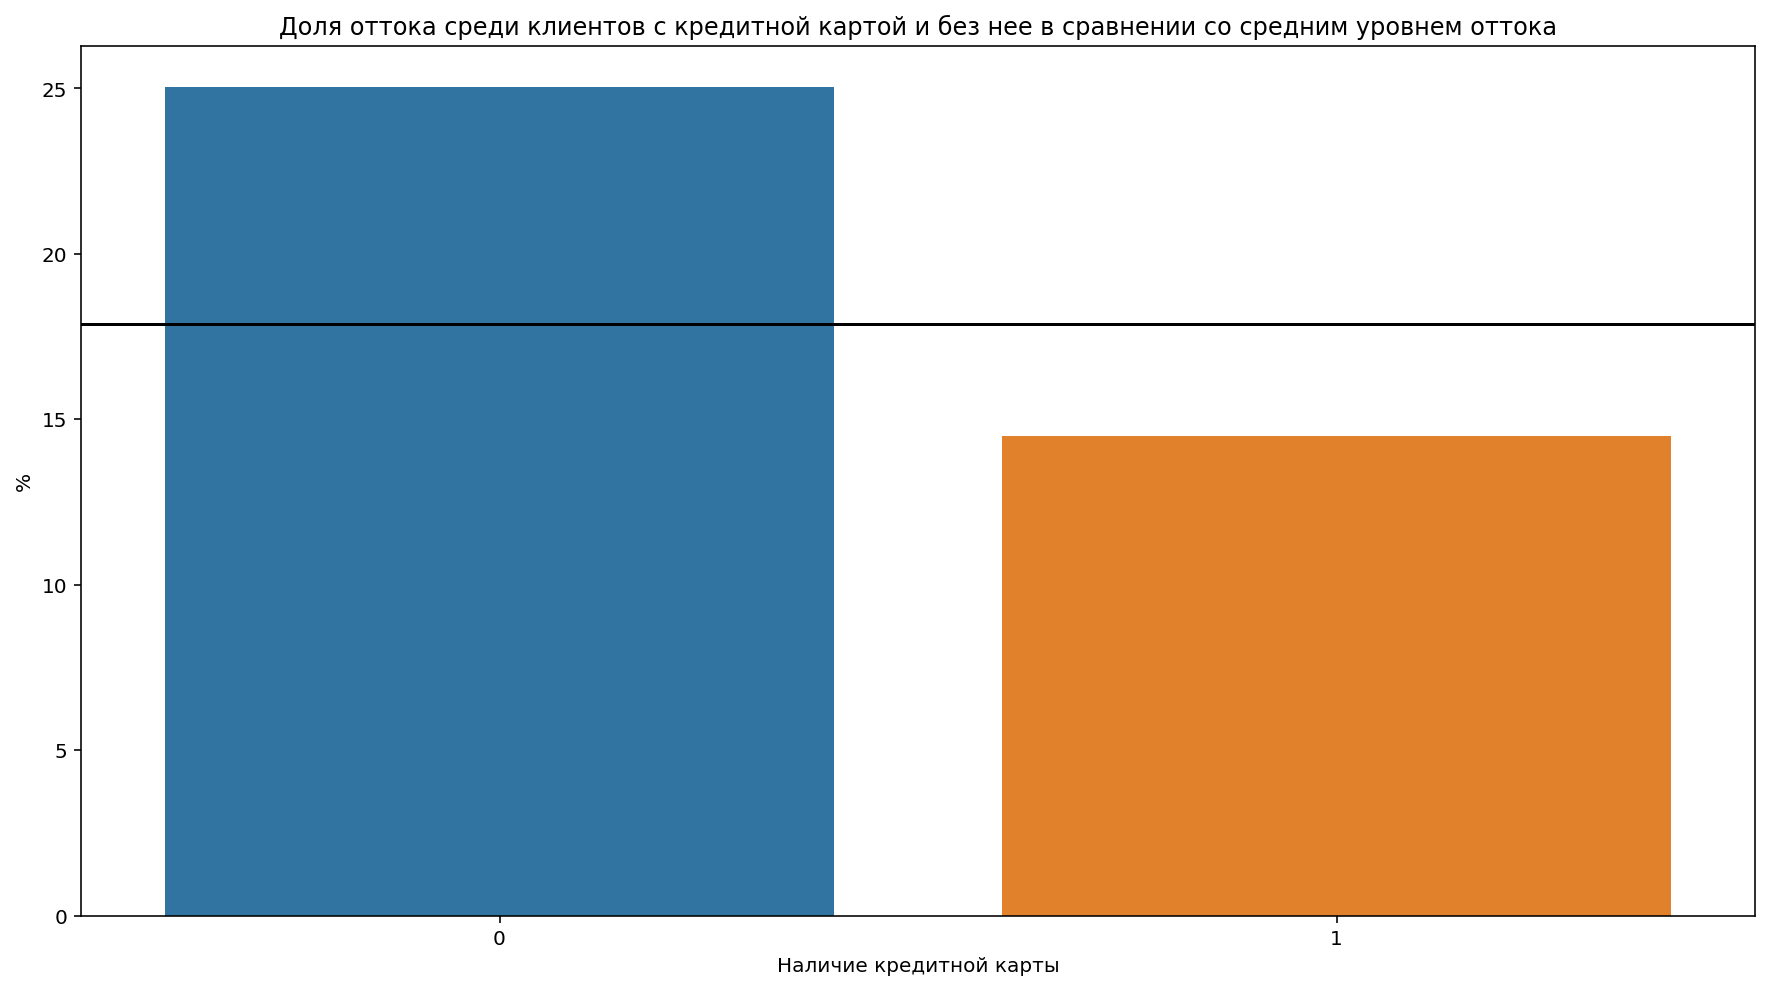

In [64]:
# Посчитаем долю оттока среди клиентов с кредитной картой и без нее.
credit_card_gr = data.groupby('credit_card')['churn'].mean().reset_index()
credit_card_gr['churn'] = credit_card_gr['churn']*100

# Визуализируем.
ax = sns.barplot(x=credit_card_gr['credit_card'], y=credit_card_gr['churn'])
ax.axhline(data['churn'].mean()*100, color='black')
ax.set(title='Доля оттока среди клиентов с кредитной картой и без нее в сравнении со средним уровнем оттока', 
       xlabel='Наличие кредитной карты', ylabel='%')
plt.show()

На графике видно, что среди клиентов с кредитной картой доля оттока ниже, чем без нее и в среднем по банку.

<a id='21-bullet'></a>

### Анализ баллов скоринга

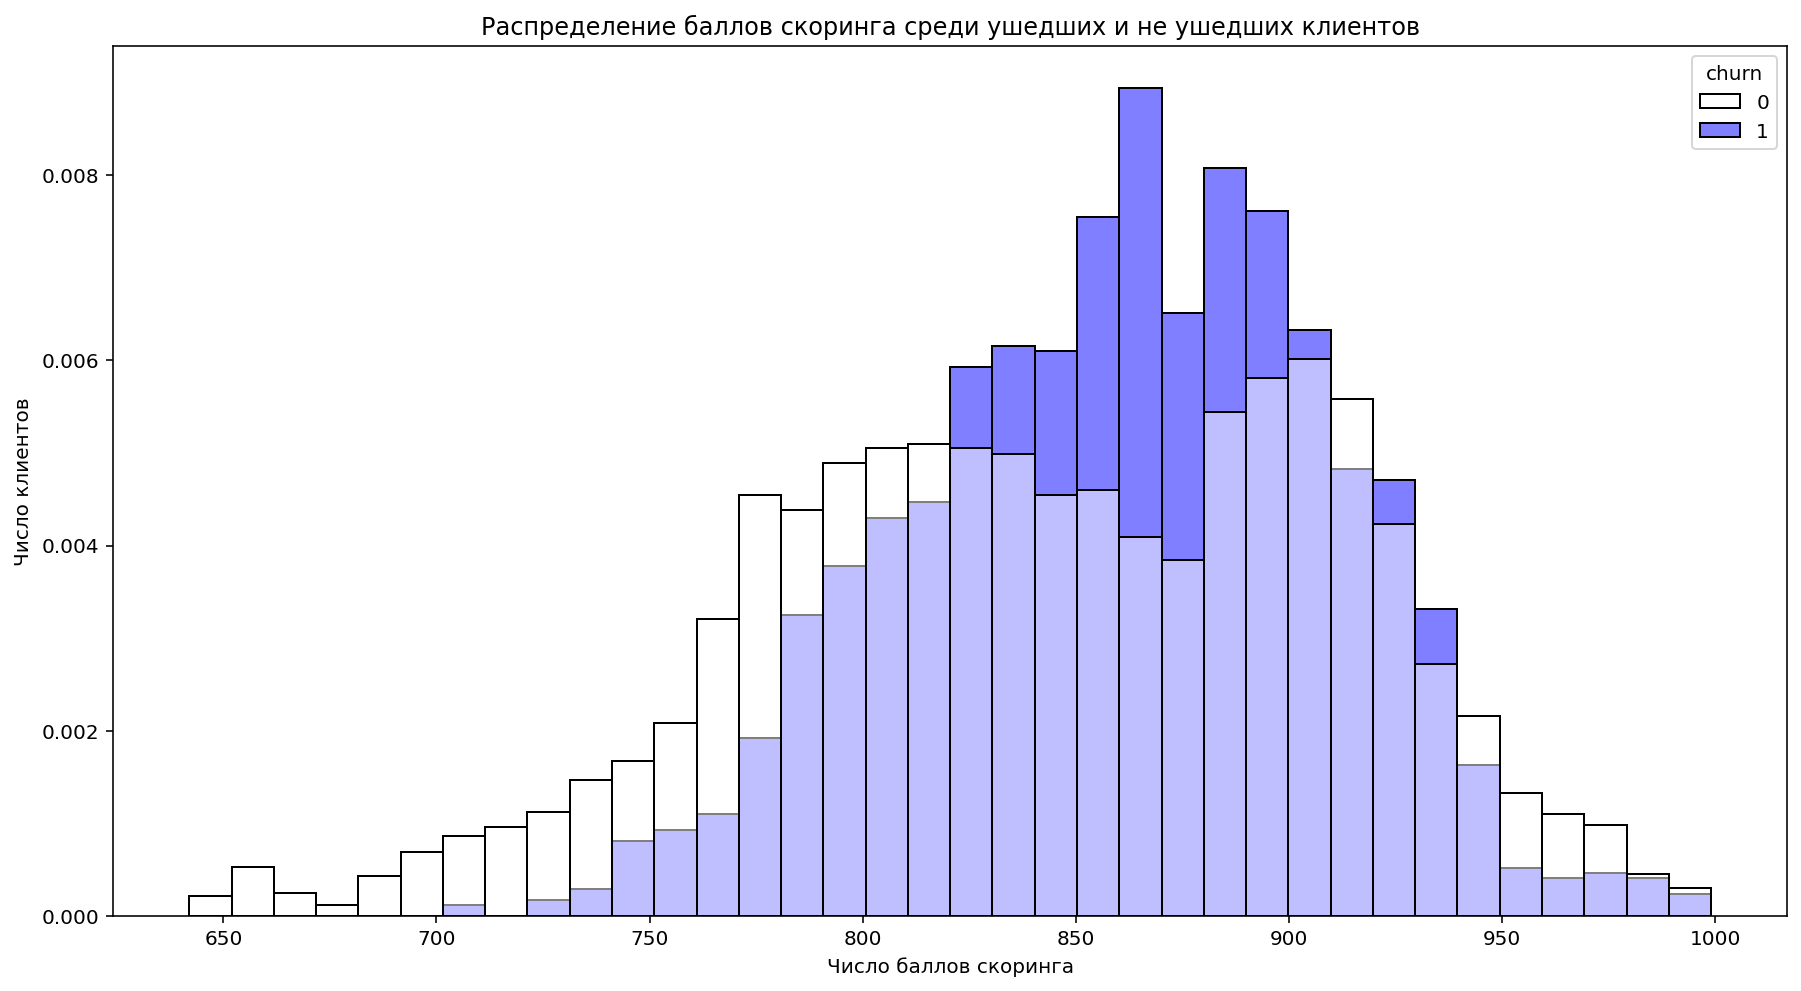

In [65]:
# Посмотрим распределение баллов скоринга среди ушедших и не ушедших.

(
sns.histplot(data=data, hue='churn', x='score', stat='density', common_norm=False, palette='flag', bins=36)
            .set(title='Распределение баллов скоринга среди ушедших и не ушедших клиентов', 
            xlabel='Число баллов скоринга', ylabel='Число клиентов')
);

На графике видно, что среди клиентов с баллами в интервале 820-900 отток выше. Особенно высока доля оттока среди клиентов с 860 баллами.

<a id='22-bullet'></a>

### Анализ заработной платы

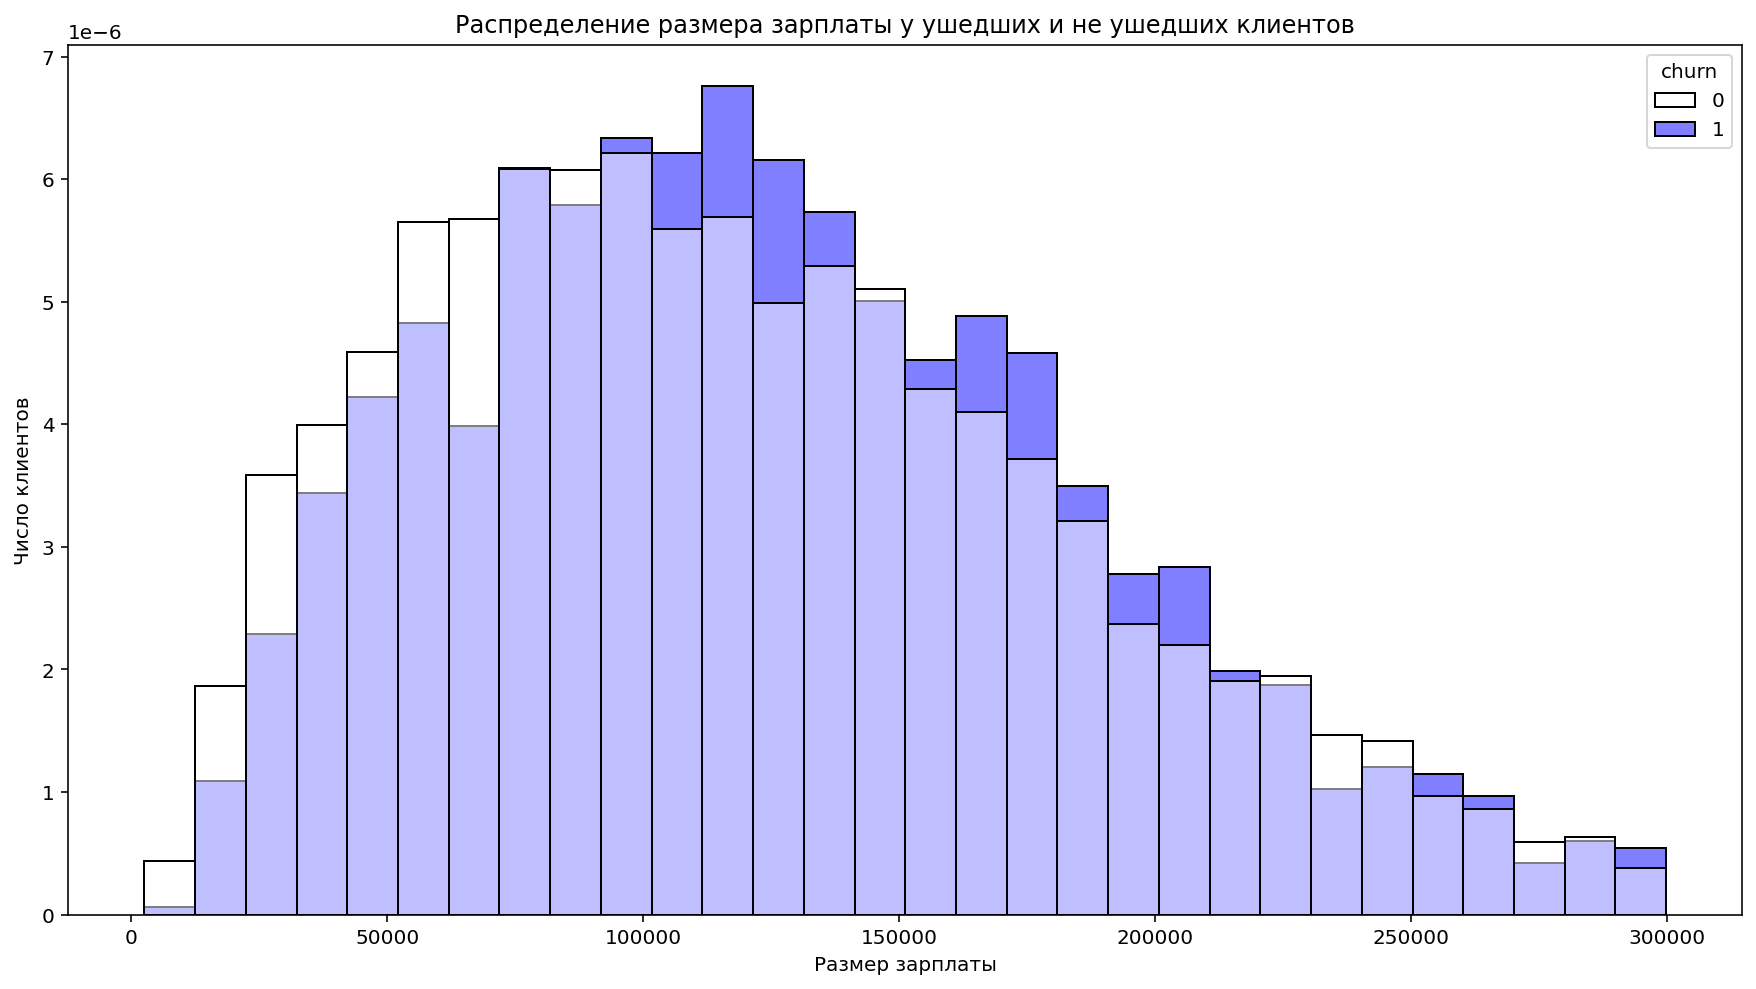

In [66]:
# Посмотрим распределение размера зарплаты у ушедших и не ушедших. Для наглядности ограничим 300 тыс.

(
sns.histplot(data=data.loc[data['est_salary'] < 300000], hue='churn', x='est_salary', stat='density',
             common_norm=False, palette='flag', bins=30)
             .set(title='Распределение размера зарплаты у ушедших и не ушедших клиентов', 
             xlabel='Размер зарплаты', ylabel='Число клиентов')
);

На графике видно, что среди клиентов с зарплатой от 100 до 210 тысяч (с исключением около 150 тыс.) доля оттока выше.

<a id='23-bullet'></a>

### Анализ активности

In [67]:
last_activity_1 = data.loc[data['churn'] == 1].groupby('last_activity')['userid'].count().reset_index()
last_activity_1['%'] = round(last_activity_1['userid'] / last_activity_1['userid'].sum() * 100)
print(last_activity_1)

last_activity_0 = data.loc[data['churn'] == 0].groupby('last_activity')['userid'].count().reset_index()
last_activity_0['%'] = round(last_activity_0['userid'] / last_activity_0['userid'].sum() * 100)
last_activity_0

   last_activity  userid     %
0              0     526  30.0
1              1    1210  70.0


,last_activity,userid,%
0,0,4123,52.0
1,1,3858,48.0


Среди ушедших доля активных клиентов (70 %) больше, чем среди оставшихся (48 %).

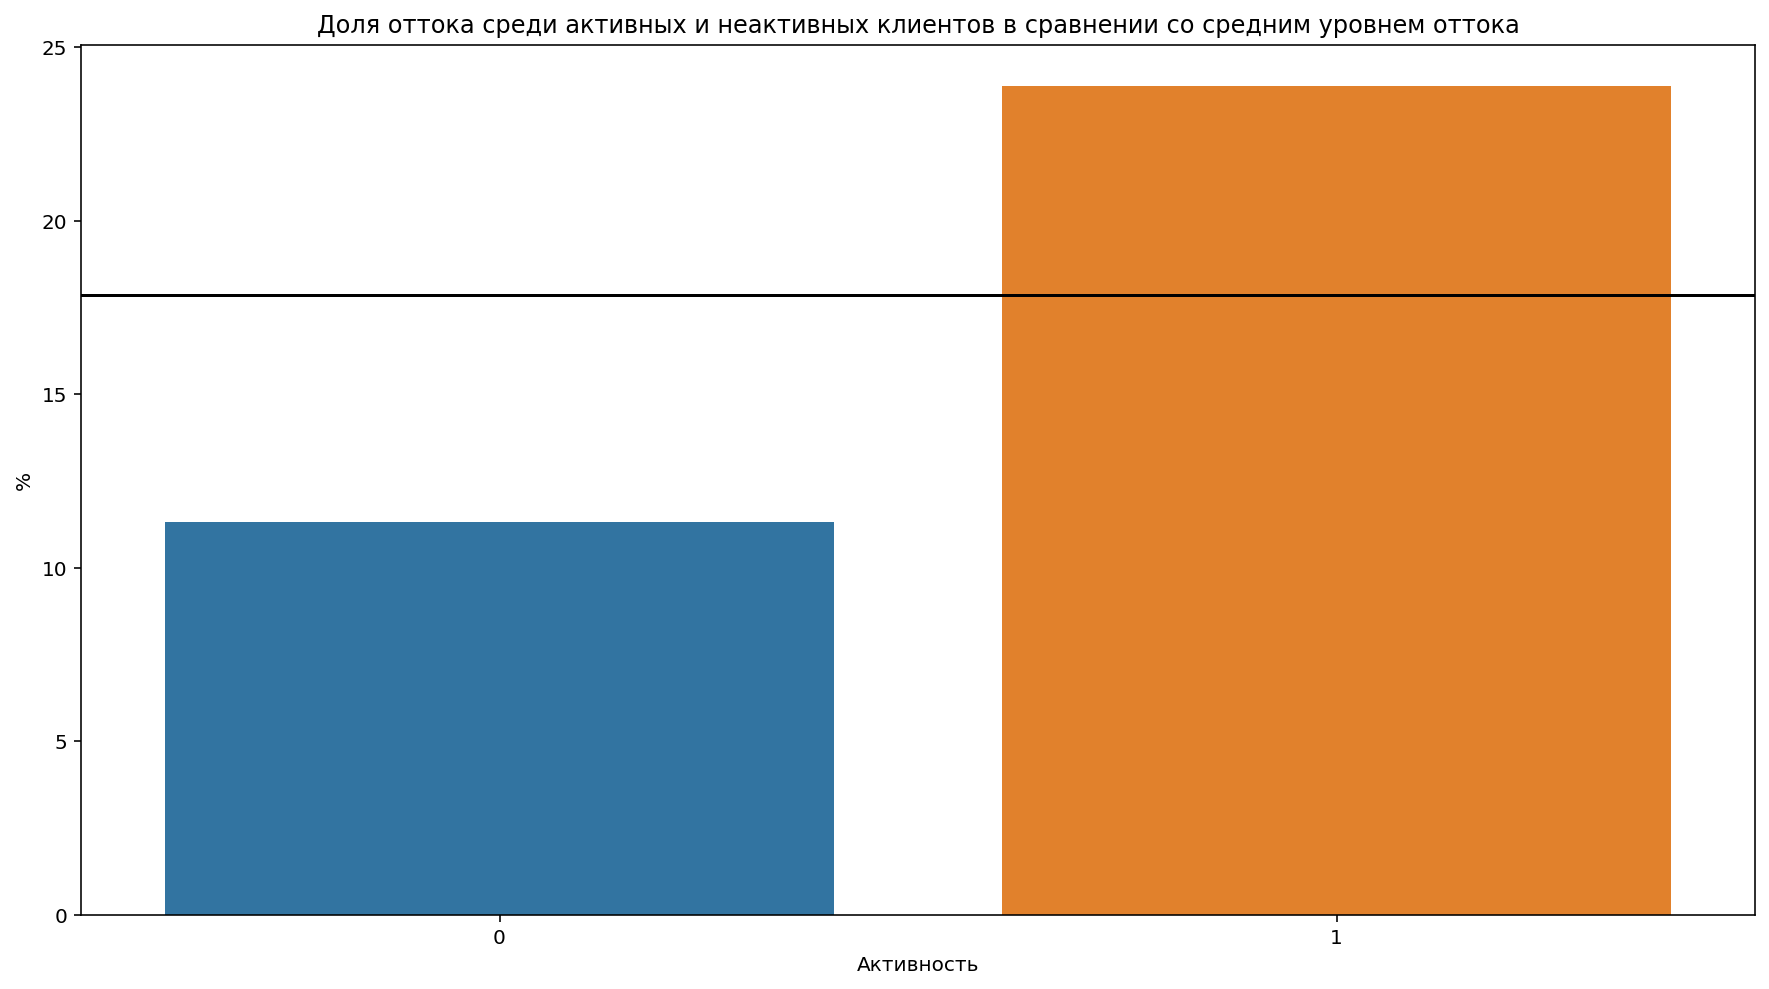

In [68]:
# Посчитаем долю оттока среди активных и неактивных клиентов.
activity_gr = data.groupby('last_activity')['churn'].mean().reset_index()
activity_gr['churn'] = activity_gr['churn']*100

# Визуализируем.
ax = sns.barplot(x=activity_gr['last_activity'], y=activity_gr['churn'])
ax.axhline(data['churn'].mean()*100, color='black')
ax.set(title='Доля оттока среди активных и неактивных клиентов в сравнении со средним уровнем оттока', 
       xlabel='Активность', ylabel='%')
plt.show()

На графике видно, что среди активных клиентов доля оттока выше, чем среди неактивных и в среднем по банку.

<a id='24-bullet'></a>

### Таблица сравнения ушедших и оставшихся

In [69]:
# Посчитаем средние и медианные значения для ушедших и оставшихся клиентов.

temp_data = (
             data.groupby('churn').agg({'est_salary':'mean', 
             'age':'mean', 'balance':'mean', 'score':'mean','products':'median', 'equity':'median'}).round()
             .reset_index()
)

temp_2_data = data.groupby('churn')[['gender', 'city']].agg(pd.Series.mode).reset_index()
                                    
churn_data = temp_data.merge(temp_2_data, on='churn', how='left')

In [70]:
# Переименуем столбцы.

churn_data = churn_data.rename(columns={'est_salary':'Средняя зарплата', 'age':'Средний возраст', 'balance':'Средний баланс',
                           'score':'Средний балл скоринга', 'products':'Медианное число продуктов',
                           'equity':'Медианное число собственности',
                           'city':'Мода по городу',
                           'gender':'Мода по полу'})
churn_data

,churn,Средняя зарплата,Средний возраст,Средний баланс,Средний балл скоринга,Медианное число продуктов,Медианное число собственности,Мода по полу,Мода по городу
0,0,136529.0,43.0,634304.0,845.0,2,3,Ж,Ярославль
1,1,137784.0,41.0,970013.0,861.0,2,4,М,Ярославль


In [71]:
# Повернем таблицу на 90 градусов по часовой стрелке.

churn_data = churn_data.T.reset_index()
churn_data

,index,0,1
0,churn,0,1
1,Средняя зарплата,136529.0,137784.0
2,Средний возраст,43.0,41.0
3,Средний баланс,634304.0,970013.0
4,Средний балл скоринга,845.0,861.0
5,Медианное число продуктов,2,2
6,Медианное число собственности,3,4
7,Мода по полу,Ж,М
8,Мода по городу,Ярославль,Ярославль


In [72]:
# Переименуем столюцы и удалим лишнюю строку.

churn_data.columns = ['Признак', 'Не отток', 'Отток']
churn_data = churn_data.drop(labels = [0],axis = 0)
churn_data

,Признак,Не отток,Отток
1,Средняя зарплата,136529.0,137784.0
2,Средний возраст,43.0,41.0
3,Средний баланс,634304.0,970013.0
4,Средний балл скоринга,845.0,861.0
5,Медианное число продуктов,2,2
6,Медианное число собственности,3,4
7,Мода по полу,Ж,М
8,Мода по городу,Ярославль,Ярославль


In [73]:
# Посчитаем относительную разницу по средним значениям.

for i in [1, 2, 3, 4]:
    churn_data.loc[i, 'Относительная разница'] = round(
        (churn_data.loc[i, 'Отток'] - churn_data.loc[i, 'Не отток']) /
        (churn_data.loc[i, 'Отток'] + churn_data.loc[i, 'Не отток']) * 100, 2
    )

churn_data

,Признак,Не отток,Отток,Относительная разница
1,Средняя зарплата,136529.0,137784.0,0.46
2,Средний возраст,43.0,41.0,-2.38
3,Средний баланс,634304.0,970013.0,20.93
4,Средний балл скоринга,845.0,861.0,0.94
5,Медианное число продуктов,2,2,NaN
6,Медианное число собственности,3,4,NaN
7,Мода по полу,Ж,М,NaN
8,Мода по городу,Ярославль,Ярославль,NaN


Наиболее значимое числовое различие в среднем балансе: у ушедших он был почти на 21 % выше.
Средняя зарплата, средний возраст, медианное число продуктов практически не отличаются.
У ушедших медианный средний балл собственности выше на 1.
Среди ушедших чаще встречаются мужчины, среди оставшихся чаще женщины.

<a id='25-bullet'></a>

### Анализ корреляции признаков

In [74]:
# Сохраним нужный солбец в переменную
# Посмотрим корреляцию показателей.

correlation = data[['churn', 'score', 'age', 'equity', 'balance', 'products', 
      'credit_card', 'est_salary', 'last_activity', 'gender_code_Ж']].corr().reset_index()
correlation = correlation[['index', 'churn']]
correlation

,index,churn
0,churn,1.000000
1,score,0.098695
2,age,-0.047915
3,equity,0.264180
4,balance,0.220316
5,products,0.296185
6,credit_card,-0.128175
7,est_salary,0.004761
8,last_activity,0.163802
9,gender_code_Ж,-0.140517


Наиболее высокая корреляция с числом продуктов, но и она всего 0,3 — прямая слабая. Такая же прямая слабая с баллом недвижимости и балансом. 
Такие данные могут свидетельстваовать о необходимости выбора нескольких критериев для выявления "группы риска" по оттоку.

Предварительные общие выводы будут сделаны в отдельном разделе далее.

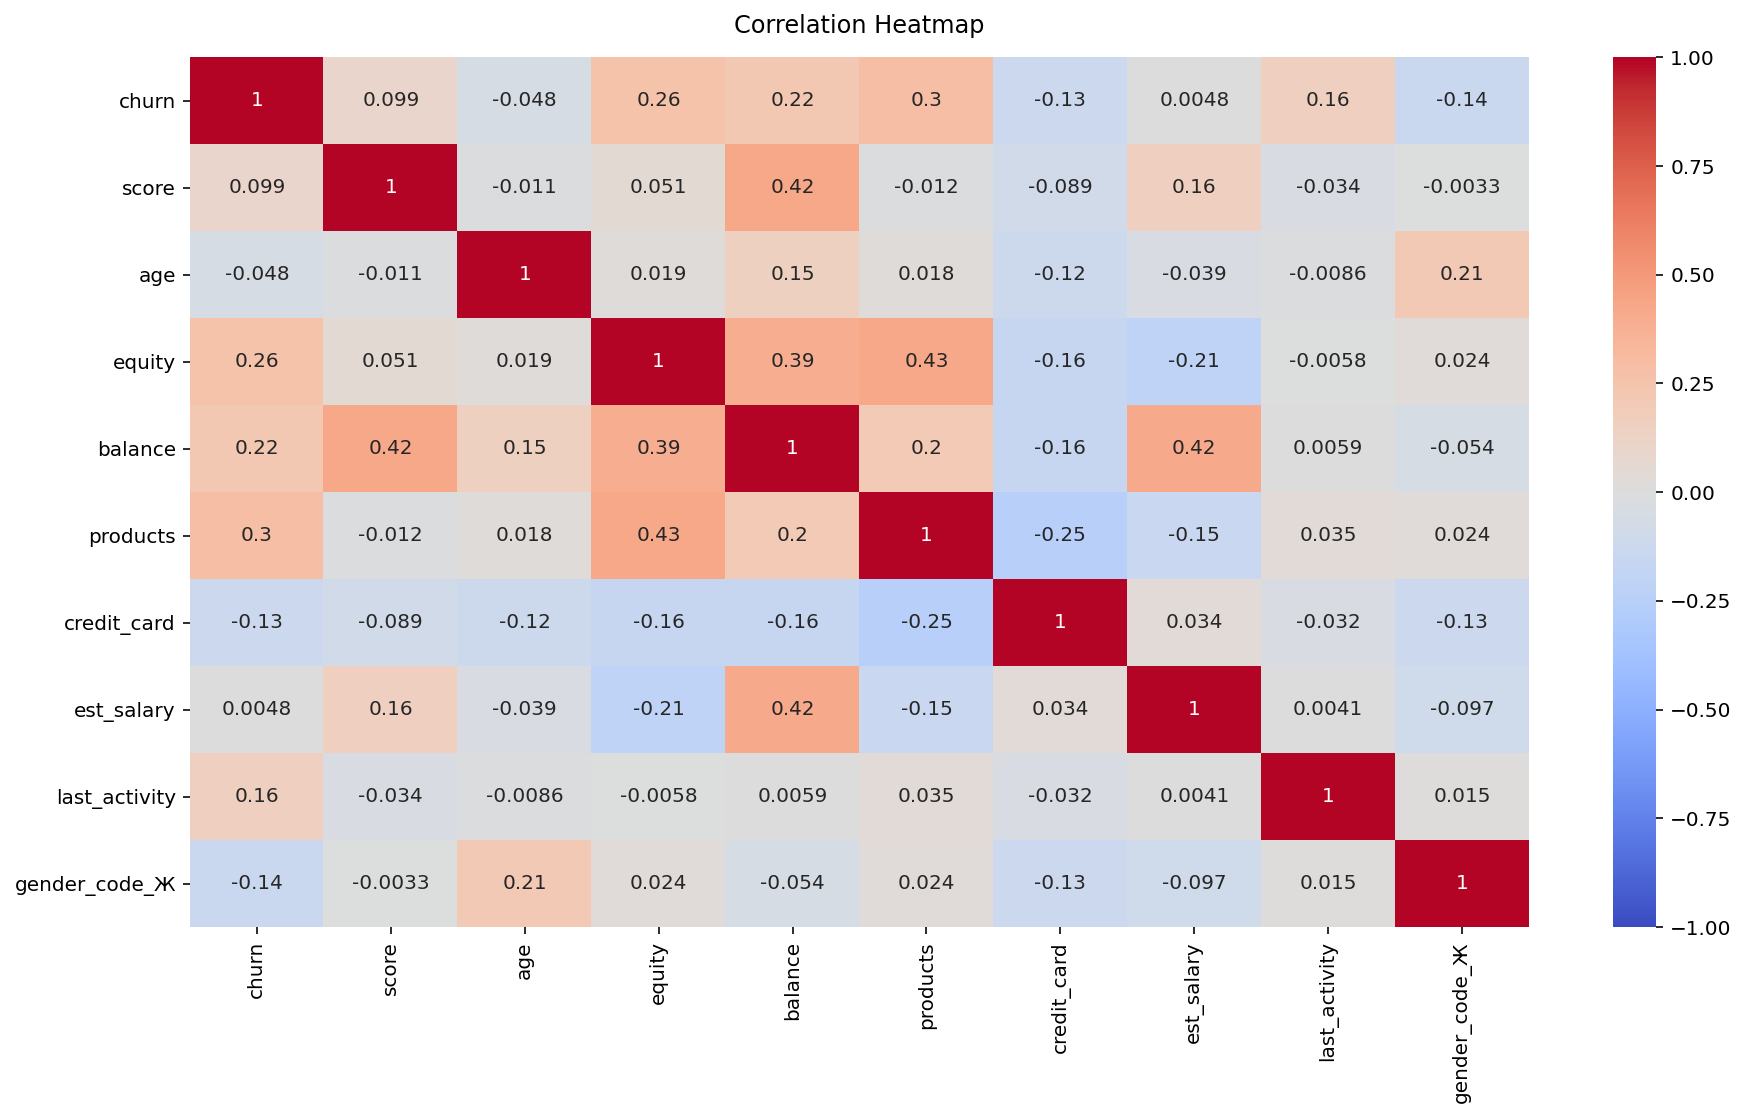

In [75]:
# Визуализируем корреляцию.

heatmap = sns.heatmap(data[['churn', 'score', 'age', 'equity', 'balance', 'products', 
      'credit_card', 'est_salary', 'last_activity', 'gender_code_Ж']].corr(), 
                      cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True) 

# Дайте тепловой карте название. Параметр pad (padding) определяет расстояние заголовка от верхней части тепловой карты. 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Шкала Чеддока:
* слабая — от 0,1 до 0,3;
* умеренная — от 0,3 до 0,5;
* заметная — от 0,5 до 0,7;
* высокая — от 0,7 до 0,9;
* весьма высокая (сильная) — от 0,9 до 1,0.

    
Соответственно корреляция оттока и балла скоринга, балла собственности, суммы на балансе, наличия кредитной карты, активности и пола — слабая. Корреляция оттока и числа продуктов умеренная.

## Проверка гипотез

<a id='26-bullet'></a>

### Различие уровня дохода между теми клиентами, которые ушли и теми, которые остались

Для применения t-теста необходимо проверить следующие аспекты:

* Генеральные совокупности не должны зависеть друг от друга — у нас два независимых доуг от друга пула клиентов, возможные пересечения из-за дублирования userid были удалены.
* Выборочные средние должны быть нормально распределены — поскольку у нас в каждой группе несколько тысяч клиентов, по ЦПТ выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности.
* Дисперсии рассматриваемых генеральных совокупностей должны быть равны — соотношение ушедших и оставшихся клиентов в датасете отличается значительно: разница больше, чем в четыре раза, поэтому необходимо параметр equal_var указать False.

Первая гипотеза: 
0 — средний размер зарплаты ушедших клиентов равен среднему размеру зарплаты оставшихся;
1 — средний размер зарплаты ушедших клиентов не равен среднему размеру зарплаты оставшихся.

In [76]:
# Проверим первую гипотезу.

results = st.ttest_ind(data.loc[data['churn'] == 1, 'est_salary'], 
                       data.loc[data['churn'] == 0, 'est_salary'], equal_var = False)

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.6018842735720363
Не получилось отвергнуть нулевую гипотезу


<a id='27-bullet'></a>

### Различие числа используемых продуктов между теми клиентами, которые ушли и теми, которые остались

Вторая гипотеза: 
0 — среднее число продуктов, использовавшихся ушедшими клиентами, равен среднему числу продуктов, используемых оставшимися клиентами;
1 — среднее число продуктов, использовавшихся ушедшими клиентами, не равен среднему числу продуктов, используемых оставшимися клиентами.

In [77]:
# Проверим первую гипотезу.

results = st.ttest_ind(data.loc[data['churn'] == 1, 'products'], 
                       data.loc[data['churn'] == 0, 'products'], equal_var = False)

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.3274720485877984e-130
Отвергаем нулевую гипотезу


Средний размер зарплаты ушедших клиентов равен среднему размеру зарплаты оставшихся клиентов, а средее число используемых продуктов отличается.

## Формулирование предварительных выводов

<a id='28-bullet'></a>

### Педварительные выводы

Отток выше среди клиентов:
* Мужчин;
* В возрастных группах 25-35 и 50-60 лет;
* С баллами собственности 7-9;
* С балансом более 700 тыс., а особенно с балансом более 1 млн.;
* Пользующихся более чем двумя продуктами, особенно четырьмя продуктами;
* Без кредитной карты;
* Баллами скоринга 820-900;
* С зарплатой 100 до 210 тысяч (с исключением около 150 тыс.);
* Активных.

Различия по филиалам практически отсутствуют.

<a id='29-bullet'></a>

### На основании выводов выбор признаков для сегментации

Признаки для сегментации: мужской пол, возраст 25-35 и 50-60 лет, балл собственности 7-9, баланс более 1 млн., более двух продуктов, без кредитной карты, балл скоринга 820-900, зарплата 100-210, активные.

## Сегментация

<a id='30-bullet'></a>

### Выделение категорий клиентов, в которых % оттока выше, чем в среднем среди всех клиентов

In [78]:
# Для начала посмотрим процент ушедших клиентов.

round(data['churn'].mean() * 100)

18

В срднем отток 18 %.

На основании предвартельно проведенного анализа выбрали однозначные критерии: мужской пол, баллы недвижимости 3-5, активные клиенты — посмотрим, каков процент при данных условиях.

In [80]:
# Чтобы удобнее было проверять уровень оттока и число потенциальной целевой аудитории, создадим переменные с условиями.

aa = (data['churn'] == 0)
a = (data['gender'] == 'М')
b = ((data['age'] >= 25) & (data['age'] <= 35))
c = ((data['age'] >= 50) & (data['age'] <= 60))
d = ((data['equity'] >= 7) & (data['equity'] <= 9))
e = (data['balance'] >= 700000)
f = (data['products'] > 2)
g = (data['credit_card'] == 0)
h = ((data['score'] >= 820) & (data['score'] <= 900))
i = ((data['est_salary'] >= 100000) & (data['est_salary'] <= 210000))
k = (data['last_activity'] == 0)

In [81]:
# Выберем мужчин, обеих возрастных групп (25-35 и 50 - 60) c балансом более 700 тыс.
data_1 = data.loc[a & (b | c) & e]

print('Размер целевой аудитории:', data_1.loc[data_1['churn'] == 0, 'userid'].count())

print('% оттока:', round(data_1['churn'].mean()*100,2))

Размер целевой аудитории: 309
% оттока: 54.69


In [82]:
# Выберем клиентов с двумя продуктами и зарплатой 100-210 тыс.
data_1 = data.loc[f & i]

print('Размер целевой аудитории:', data_1.loc[data_1['churn'] == 0, 'userid'].count())

print('% оттока:', round(data_1['churn'].mean()*100,2))

Размер целевой аудитории: 350
% оттока: 45.48


In [83]:
# Выберем мужчин без кредитной карты с баллами скоринга 820-900.
data_1 = data.loc[a & g & h]

print('Размер целевой аудитории:', data_1.loc[data_1['churn'] == 0, 'userid'].count())

print('% оттока:', round(data_1['churn'].mean()*100,2))

Размер целевой аудитории: 360
% оттока: 40.5


In [84]:
group_churn_start = round(
 data.loc[(data['gender'] == 'М') & (data['last_activity'] == 1) & (data['equity'] >= 3)
          & (data['equity'] <= 5), 'churn'].mean()*100,2
)
group_churn_start

43.83

Почти 44 % — больше, чем в два раза выше среднего, но нужно добавить еще баланс и возраст. Для этого создадим группы по возрасту с шагом в 10 лет и по балансу с шагом в 100 тыс. и сохраним отфильтрованные данные по уже выбранным критериям.

In [85]:
data_filtered = data.loc[(data['gender'] == 'М') & (data['last_activity'] == 1) & (data['equity'] >= 3)
          & (data['equity'] <= 5)]
data_filtered.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_code_Ростов,city_code_Рыбинск,city_code_Ярославль,gender_code_Ж,gender_code_М
14,172138,815.0,Ярославль,М,35.0,5,547499.87,2,1,1,105883.26,0,0,0,1,0,1
16,123335,829.0,Ярославль,М,45.0,5,507842.84,1,1,1,169330.64,0,0,0,1,0,1
35,221927,863.0,Ростов,М,39.0,5,1461423.33,1,0,1,221699.52,0,1,0,0,0,1
36,199614,822.0,Ярославль,М,60.0,5,1472483.77,1,1,1,89132.67,0,0,0,1,0,1
45,118849,826.0,Ярославль,М,31.0,4,333330.99,1,1,1,46981.53,0,0,0,1,0,1


Три сегмента:
* Мужчины, возраст 25-35 и 50 - 60 лет c балансом более 700 тыс., доля ушедших почти 55 %, среди еще не ушедших таких клиентов 309;
* Клиенты с двумя продуктами и зарплатой 100-210 тыс., доля ушедших 45 %, среди еще не ушедших таких клиентов 350;
* Мужчины без кредитной карты с баллами скоринга 820-900, доля ушедших почти 41 %, среди еще не ушедших таких клиентов 360.

## Формулирование выводов и рекомендаций

<a id='31-bullet'></a>

### Выводы и рекомендации


* Первому сегменту (мужчины, возраст 25-35 и 50 - 60 лет c балансом более 700 тыс.) стоит предложить вклад с повышенной ставкой при условии открытия на продолжительный срок. У данных клиентов есть средства, которые они могут положить на вклад, пока у них будет вклад, вряд ли они уйдут из банка, так как досрочное расторжение договора приведет к потере доходности.
* Второму сегменту (клиенты с двумя продуктами и зарплатой 100-210 тыс.) стоит предложить стать зарплатными клиентами (если еще не являются таковыми) и рассмотреть вариант услуг по подписочной модели: онлайн кинотеатры, музыкальные сервисы, игры, облачные хранилища данных, связь. Обычно, люди с более высокими доходами имеют возможность пиобретать не только необходимые товары, но и подобные услуги.
* Третьему сегменту (мужчины без кредитной карты с баллами скоринга 820-900) стоит сформировать предложение по кредитной карте: хороший балл скоринга минимизирует риски невозврата.


<a id='32-bullet'></a>

### Приоритезация сегментов

Приоритетность сегментов:
* Мужчины, возраст 25-35 и 50 - 60 лет c балансом более 700 тыс., доля ушедших почти 55 %, среди еще не ушедших таких клиентов 309. Тут максимальный процент оттока и минимальная (при этом более 300) целевая аудитория - есть возможность индивидуального подхода. Наиболее простое продуктовое предлоежение.;
* Клиенты с двумя продуктами и зарплатой 100-210 тыс., доля ушедших 45 %, среди еще не ушедших таких клиентов 350. Доля ушедших ниже, целевая аудитория выше, но это люди с высоким для регионов доходом — могут себе позволить дополнительные усули и оплату за них. Более стожное предложение, но отсутсвие рисков — есть возможность не только удержать клиентов, но и дополнительно заработать;
* Мужчины без кредитной карты с баллами скоринга 820-900, доля ушедших почти 41 %, среди еще не ушедших таких клиентов 360. Доля ушедших еще ниже, целевая аудитория еще чуть больше, продуктовое предложение относительно не сложное, но более рискованное — есть возможность не только удержать клиентов, но и заработать.

В рамках работы над проектом изучены исходные данные, удалены пропуски, допустимые к удалению, изучены и оставлены без изменения пропуски, не влияющие на расчеты и анализ, удалены неявные дубликаты, закодированы категориальные переменные.
    
Изучен портрет клиента банка: равная доля мужчин и женщин, в возрасте от 18 до 86 лет, с доходами выше среднего, хорошими аллами скоринга и объектами собственности. При этом активность пользователей относительно невысокая.
    
Произведено стравнение доли оттока клиентов в разных группах, а так же с уровнем оттока в среднем по банку. Склонны к оттоку: мужчины, в возрасте 25-35 и 50-60 лет, с баллами собственности 7-9, с балансом более 700 тыс., пользующихся более чем двумя продуктами, без кредитной карты, баллами скоринга 820-900, зарплатой 100- 210 тысяч, активные.
    
Проверены гипотезы: доход может не влиять на отток, число используемых продуктов может влиять на отток.
    
Выбраны целевые сегменты клиентов с высоким процентом оттока и с условием адресного ручного взаимодейтсия (число целевых оставшихся клиентов 300-400) и выработаны предложения по их удержанию: клиентам, имеющим крупные суммы на счете — вклад с повышенной ставкой, клиентам с высоким уровнем дохода — зарплатные проект и дополнительные платные услуги по подписочной модели, клиентам без кредитной карты и высоким баллом скоринга — кредитный продукт. 

## Подготовка презентации

<a id='33-bullet'></a>

 ### Презентация

[Пезентация](https://drive.google.com/file/d/1qKsE-jGULUM3K09tGPAXhOaPsGVenThK/view?usp=share_link).

## Подготовка дашборда

<a id='34-bullet'></a>

### Дашборд

[Дашборд](https://public.tableau.com/views/_16869140784010/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link).